# Análise Exploratória Univariada
Faça uma análise univariada de todas as variáveis da análise.

Depois julgue como proceder com os casos faltantes nas variáveis.

Em seguida, re-agrupe ou re-codifique as variáveis que julgar necessário.

## Inicialização

### Importando pacotes e carregando dados

In [1]:
import math
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import utils  # Funções auxiliares para a análise

# Oculta warnings do notebook
import warnings
warnings.filterwarnings('ignore')

# Configurações para facilitar a visualização dos dataframes
pd.set_option('display.max_rows', 35)
pd.set_option('display.max_columns', 50)
pd.options.display.float_format = '{:,.3f}'.format

In [2]:
# Carregando dados pré-processados
dataset_path = '../data/output/'
dataset_name = 'step_1_output.csv'

df = pd.read_csv(f"{dataset_path}{dataset_name}")

In [3]:
# Indicando categorias com ordenação
df['PHQ_GRP'] = pd.Categorical(
    df['PHQ_GRP'], ['sem sint', 'lev', 'mod', 'mod-sev', 'sev']
)

df['DMDEDUC'] = pd.Categorical(
    df['DMDEDUC'], ['< 9', '9 - 12', 'Ens Med', 'Sup Incomp', 'Supr Comp']
)

df['ADHERENCE'] = pd.Categorical(
    df['ADHERENCE'], ['baixo', 'adeq', 'acima',]
)

### Checagem geral

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SEQN                      5334 non-null   int64   
 1   DPQ010                    4827 non-null   float64 
 2   DPQ020                    4831 non-null   float64 
 3   DPQ030                    4829 non-null   float64 
 4   DPQ040                    4831 non-null   float64 
 5   DPQ050                    4832 non-null   float64 
 6   DPQ060                    4831 non-null   float64 
 7   DPQ070                    4832 non-null   float64 
 8   DPQ080                    4827 non-null   float64 
 9   DPQ090                    4834 non-null   float64 
 10  PHQ9                      4836 non-null   float64 
 11  PHQ_GRP                   4836 non-null   category
 12  RIAGENDR                  5334 non-null   object  
 13  RIDAGEYR                  5334 non-null   int64 

In [5]:
df.describe()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,PHQ9,RIDAGEYR,INDFMINC,PAG_MINW,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,"5,334.000","4,827.000","4,831.000","4,829.000","4,831.000","4,832.000","4,831.000","4,832.000","4,827.000","4,834.000","4,836.000","5,334.000","5,174.000","5,334.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000"
mean,"36,358.797",0.291,0.304,0.539,0.709,0.314,0.201,0.223,0.131,0.047,2.755,45.090,6.920,471.766,3.204,1.808,2.491,2.362,1.765,3.757,4.434,2.593,4.707,4.762,5.799,6.068,6.220,49.971
std,"2,964.732",0.660,0.654,0.874,0.874,0.700,0.557,0.588,0.450,0.272,3.753,20.146,3.136,780.353,1.470,2.141,1.951,2.173,1.915,1.605,1.008,2.172,3.237,3.420,3.496,3.178,3.330,12.325
min,"31,130.000",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.059
25%,"33,838.500",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,27.000,4.000,35.000,2.063,0.000,0.449,0.000,0.000,2.592,4.171,0.000,2.024,1.588,2.925,3.697,3.725,41.032
50%,"36,347.500",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,43.000,7.000,210.000,3.217,0.063,2.324,2.078,1.026,4.941,5.000,2.588,4.430,4.834,6.234,6.415,6.864,49.512
75%,"38,915.750",0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,4.000,62.000,10.000,568.932,4.832,4.505,4.940,5.000,3.407,5.000,5.000,5.000,7.271,7.651,9.253,8.997,9.454,58.168
max,"41,473.000",3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,27.000,85.000,13.000,"10,777.829",5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,10.000,10.000,10.000,10.000,10.000,89.529


In [6]:
df.sample(5)

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,PHQ9,PHQ_GRP,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
4756,40352,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,3.000,sem sint,M,20,Hisp,Sup Incomp,9.000,"1,071.594",acima,0.958,0.000,5.000,1.008,4.406,5.000,5.000,2.098,3.505,1.047,9.571,4.144,9.612,51.349
1672,34500,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,sem sint,M,48,Mexi,9 - 12,9.000,55.427,baixo,2.535,5.000,5.000,5.000,0.000,5.000,5.000,5.000,0.788,7.716,8.345,4.487,4.024,57.896
2064,35215,2.000,2.000,1.000,1.000,2.000,2.000,2.000,2.000,0.000,14.000,mod,F,52,Outr,< 9,10.000,0.000,baixo,3.155,0.000,2.859,5.000,0.709,5.000,3.947,0.416,8.262,7.302,8.509,10.000,0.000,55.158
2207,35486,0.000,1.000,3.000,1.000,1.000,1.000,1.000,0.000,0.000,8.000,lev,M,36,Outr,Ens Med,6.000,429.561,acima,4.202,5.000,0.310,0.000,0.571,0.948,5.000,4.181,10.000,3.199,7.633,10.000,0.156,51.201
3644,38250,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,2.000,sem sint,F,85,Mexi,9 - 12,2.000,146.640,baixo,5.000,5.000,1.656,3.313,0.000,1.392,4.861,0.889,10.000,0.000,7.375,8.373,5.595,53.453


### Separação das colunas

As colunas serão separadas de acordo com sua origem, para facilitar a organização das análises

In [7]:
def split_columns_by_source(df, step=1):
    is_phq_column = lambda x: True if (x.find('DPQ') > -1) else False
    phq_cols = [col for col in df.columns if is_phq_column(col)]
    
    is_hei_column = lambda x: True if (x.find('HEI2015') > -1) else False
    hei_cols = [col for col in df.columns if is_hei_column(col)]
    
    demo_cols = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']
    pag_cols = ['PAG_MINW', 'ADHERENCE']
    phq_score_cols = ['PHQ9', 'PHQ_GRP']
    
    return demo_cols, phq_cols, hei_cols, pag_cols, phq_score_cols

In [8]:
# Separando colunas de acordo com suas origens
demo_cols, phq_cols, hei_cols, pag_cols, phq_score_cols = split_columns_by_source(df)

print(demo_cols)
print(phq_cols)
print(hei_cols)
print(pag_cols)
print(phq_score_cols)

['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']
['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
['HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']
['PAG_MINW', 'ADHERENCE']
['PHQ9', 'PHQ_GRP']


## Análise das Variáveis

In [9]:
# Função para facilitar a visualização das análises
def column_descriptive_analysis(df, col, crop_values=20, plot_function=sns.histplot, plot_kwargs={}):
    percentiles = [0.01, 0.25, 0.50, 0.75, 0.99]
    
    description = df[col].describe(percentiles=percentiles).reset_index().rename(
        columns = {'index':'describe'}
    )
    value_counts = df[col].value_counts(dropna=False).reset_index().rename(
        columns = {'index':'value counts'}
    )
    norm_value_counts = df[col].value_counts(dropna=False, normalize=True).reset_index().rename(
        columns = {'index':'value percents'}
    )
    
    analysis = pd.concat([description, value_counts, norm_value_counts], ignore_index=False, axis=1)
    analysis = analysis.rename(columns = {col: ''})
    
    if crop_values:
        analysis = analysis[:crop_values]
    
    plot = plot_function(data=df, x=col, **plot_kwargs)
    plt.suptitle(f'Coluna: {col}')
    plt.grid()
    plt.show()
    
    print(f'Coluna: {col}')
    print(analysis.to_string(index=False))
    
    return analysis, plot


### PHQ-9

In [10]:
df[phq_cols + phq_score_cols].describe()

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,PHQ9
count,"4,827.000","4,831.000","4,829.000","4,831.000","4,832.000","4,831.000","4,832.000","4,827.000","4,834.000","4,836.000"
mean,0.291,0.304,0.539,0.709,0.314,0.201,0.223,0.131,0.047,2.755
std,0.660,0.654,0.874,0.874,0.700,0.557,0.588,0.450,0.272,3.753
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,4.000
max,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,3.000,27.000


#### DPQ010 - DPQ090

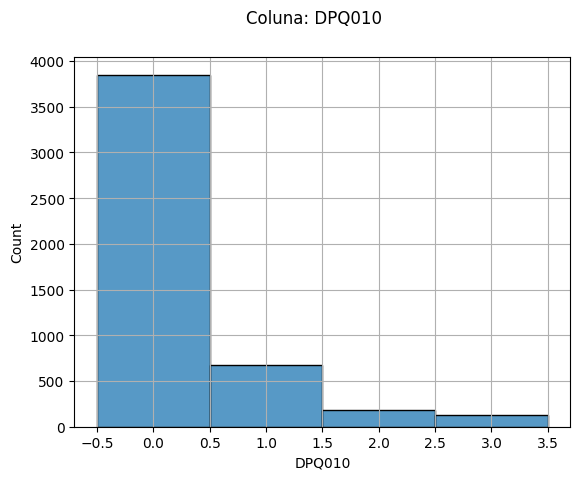

Coluna: DPQ010
describe            value counts            value percents      
   count 4,827.000         0.000 3,850.000           0.000 0.722
    mean     0.291         1.000   673.000           1.000 0.126
     std     0.660           NaN   507.000             NaN 0.095
     min     0.000         2.000   180.000           2.000 0.034
      1%     0.000         3.000   124.000           3.000 0.023
     25%     0.000           NaN       NaN             NaN   NaN
     50%     0.000           NaN       NaN             NaN   NaN
     75%     0.000           NaN       NaN             NaN   NaN
     99%     3.000           NaN       NaN             NaN   NaN
     max     3.000           NaN       NaN             NaN   NaN


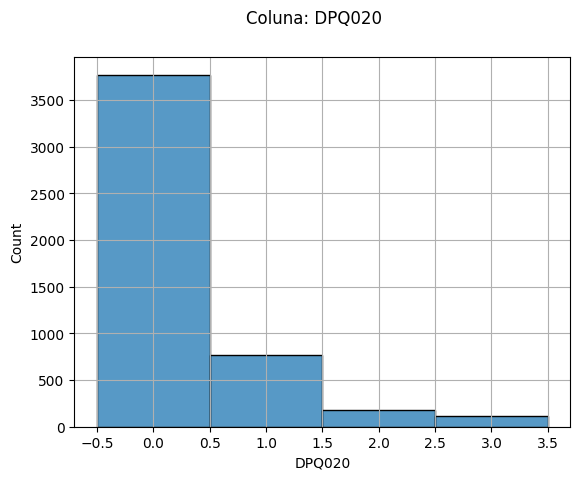

Coluna: DPQ020
describe            value counts            value percents      
   count 4,831.000         0.000 3,769.000           0.000 0.707
    mean     0.304         1.000   769.000           1.000 0.144
     std     0.654           NaN   503.000             NaN 0.094
     min     0.000         2.000   179.000           2.000 0.034
      1%     0.000         3.000   114.000           3.000 0.021
     25%     0.000           NaN       NaN             NaN   NaN
     50%     0.000           NaN       NaN             NaN   NaN
     75%     0.000           NaN       NaN             NaN   NaN
     99%     3.000           NaN       NaN             NaN   NaN
     max     3.000           NaN       NaN             NaN   NaN


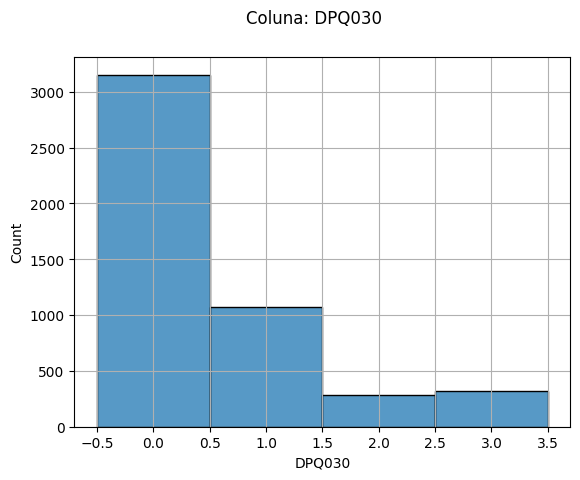

Coluna: DPQ030
describe            value counts            value percents      
   count 4,829.000         0.000 3,152.000           0.000 0.591
    mean     0.539         1.000 1,071.000           1.000 0.201
     std     0.874           NaN   505.000             NaN 0.095
     min     0.000         3.000   320.000           3.000 0.060
      1%     0.000         2.000   286.000           2.000 0.054
     25%     0.000           NaN       NaN             NaN   NaN
     50%     0.000           NaN       NaN             NaN   NaN
     75%     1.000           NaN       NaN             NaN   NaN
     99%     3.000           NaN       NaN             NaN   NaN
     max     3.000           NaN       NaN             NaN   NaN


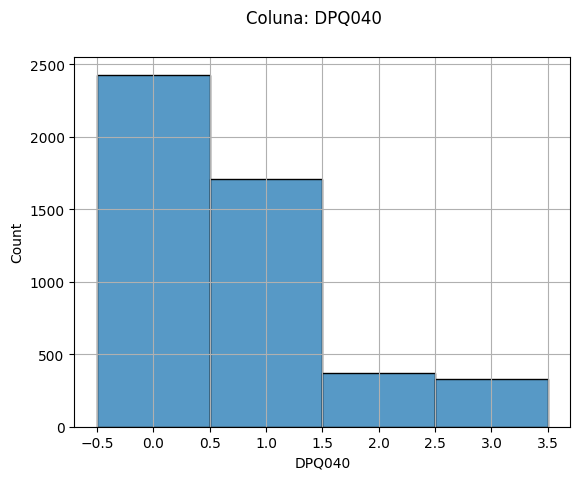

Coluna: DPQ040
describe            value counts            value percents      
   count 4,831.000         0.000 2,429.000           0.000 0.455
    mean     0.709         1.000 1,706.000           1.000 0.320
     std     0.874           NaN   503.000             NaN 0.094
     min     0.000         2.000   370.000           2.000 0.069
      1%     0.000         3.000   326.000           3.000 0.061
     25%     0.000           NaN       NaN             NaN   NaN
     50%     0.000           NaN       NaN             NaN   NaN
     75%     1.000           NaN       NaN             NaN   NaN
     99%     3.000           NaN       NaN             NaN   NaN
     max     3.000           NaN       NaN             NaN   NaN


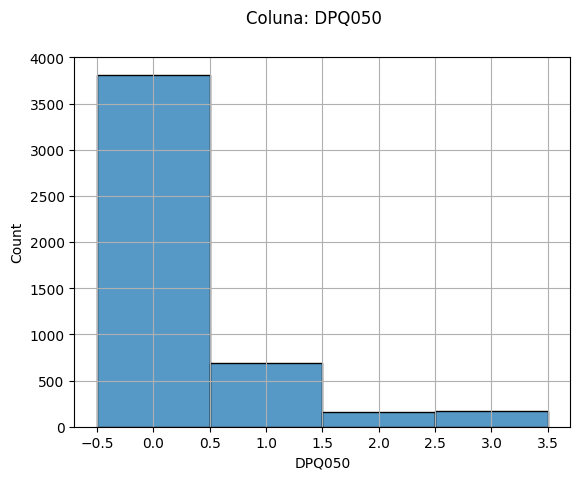

Coluna: DPQ050
describe            value counts            value percents      
   count 4,832.000         0.000 3,813.000           0.000 0.715
    mean     0.314         1.000   691.000           1.000 0.130
     std     0.700           NaN   502.000             NaN 0.094
     min     0.000         3.000   168.000           3.000 0.031
      1%     0.000         2.000   160.000           2.000 0.030
     25%     0.000           NaN       NaN             NaN   NaN
     50%     0.000           NaN       NaN             NaN   NaN
     75%     0.000           NaN       NaN             NaN   NaN
     99%     3.000           NaN       NaN             NaN   NaN
     max     3.000           NaN       NaN             NaN   NaN


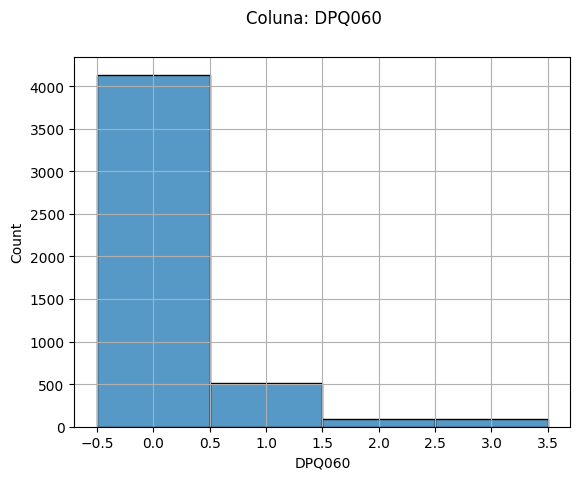

Coluna: DPQ060
describe            value counts            value percents      
   count 4,831.000         0.000 4,134.000           0.000 0.775
    mean     0.201         1.000   513.000           1.000 0.096
     std     0.557           NaN   503.000             NaN 0.094
     min     0.000         2.000    95.000           2.000 0.018
      1%     0.000         3.000    89.000           3.000 0.017
     25%     0.000           NaN       NaN             NaN   NaN
     50%     0.000           NaN       NaN             NaN   NaN
     75%     0.000           NaN       NaN             NaN   NaN
     99%     3.000           NaN       NaN             NaN   NaN
     max     3.000           NaN       NaN             NaN   NaN


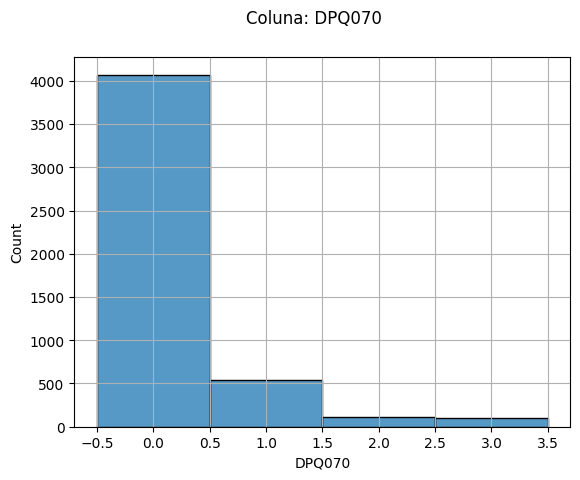

Coluna: DPQ070
describe            value counts            value percents      
   count 4,832.000         0.000 4,070.000           0.000 0.763
    mean     0.223         1.000   545.000           1.000 0.102
     std     0.588           NaN   502.000             NaN 0.094
     min     0.000         2.000   118.000           2.000 0.022
      1%     0.000         3.000    99.000           3.000 0.019
     25%     0.000           NaN       NaN             NaN   NaN
     50%     0.000           NaN       NaN             NaN   NaN
     75%     0.000           NaN       NaN             NaN   NaN
     99%     3.000           NaN       NaN             NaN   NaN
     max     3.000           NaN       NaN             NaN   NaN


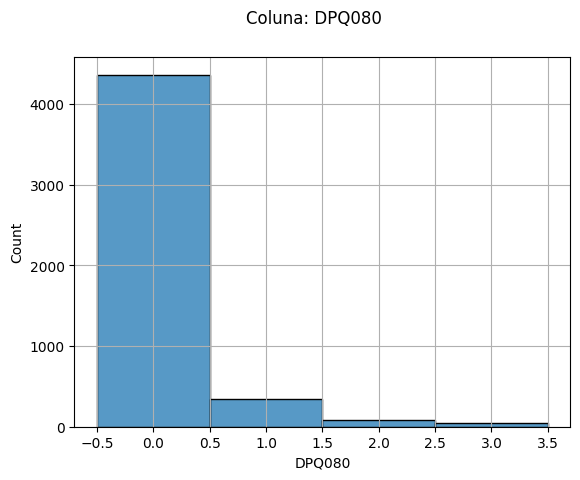

Coluna: DPQ080
describe            value counts            value percents      
   count 4,827.000         0.000 4,362.000           0.000 0.818
    mean     0.131           NaN   507.000             NaN 0.095
     std     0.450         1.000   341.000           1.000 0.064
     min     0.000         2.000    79.000           2.000 0.015
      1%     0.000         3.000    45.000           3.000 0.008
     25%     0.000           NaN       NaN             NaN   NaN
     50%     0.000           NaN       NaN             NaN   NaN
     75%     0.000           NaN       NaN             NaN   NaN
     99%     2.000           NaN       NaN             NaN   NaN
     max     3.000           NaN       NaN             NaN   NaN


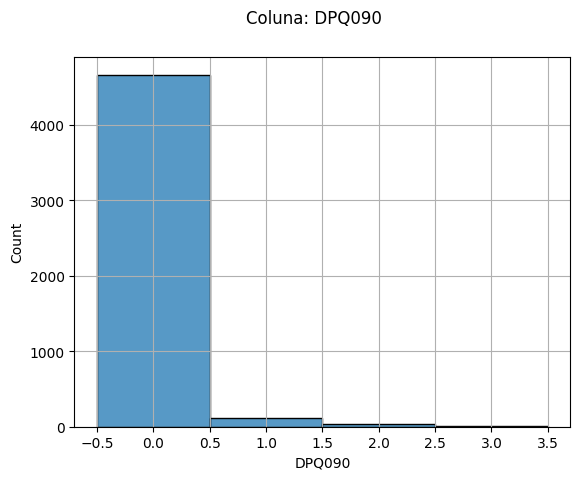

Coluna: DPQ090
describe            value counts            value percents      
   count 4,834.000         0.000 4,667.000           0.000 0.875
    mean     0.047           NaN   500.000             NaN 0.094
     std     0.272         1.000   122.000           1.000 0.023
     min     0.000         2.000    32.000           2.000 0.006
      1%     0.000         3.000    13.000           3.000 0.002
     25%     0.000           NaN       NaN             NaN   NaN
     50%     0.000           NaN       NaN             NaN   NaN
     75%     0.000           NaN       NaN             NaN   NaN
     99%     1.000           NaN       NaN             NaN   NaN
     max     3.000           NaN       NaN             NaN   NaN


In [11]:
kwargs = {
    "discrete": True, 
}
for col in phq_cols:
    column_descriptive_analysis(df, col, plot_kwargs=kwargs)

#### PHQ9

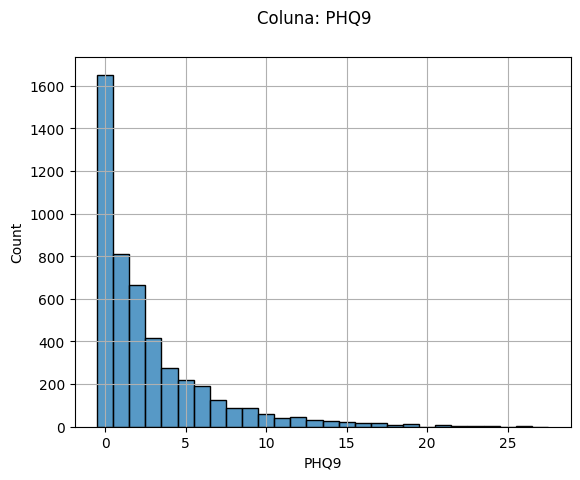

Coluna: PHQ9
describe            value counts       value percents      
   count 4,836.000         0.000 1651           0.000 0.310
    mean     2.755         1.000  808           1.000 0.151
     std     3.753         2.000  667           2.000 0.125
     min     0.000           NaN  498             NaN 0.093
      1%     0.000         3.000  416           3.000 0.078
     25%     0.000         4.000  275           4.000 0.052
     50%     1.000         5.000  217           5.000 0.041
     75%     4.000         6.000  193           6.000 0.036
     99%    17.000         7.000  124           7.000 0.023
     max    27.000         8.000   90           8.000 0.017
     NaN       NaN         9.000   90           9.000 0.017
     NaN       NaN        10.000   59          10.000 0.011
     NaN       NaN        12.000   46          12.000 0.009
     NaN       NaN        11.000   41          11.000 0.008
     NaN       NaN        13.000   31          13.000 0.006
     NaN       NaN        1

In [12]:
kwargs = {
    "discrete": True, 
}

analysis = column_descriptive_analysis(df, 'PHQ9', plot_kwargs=kwargs)

#### PHQ_GRP

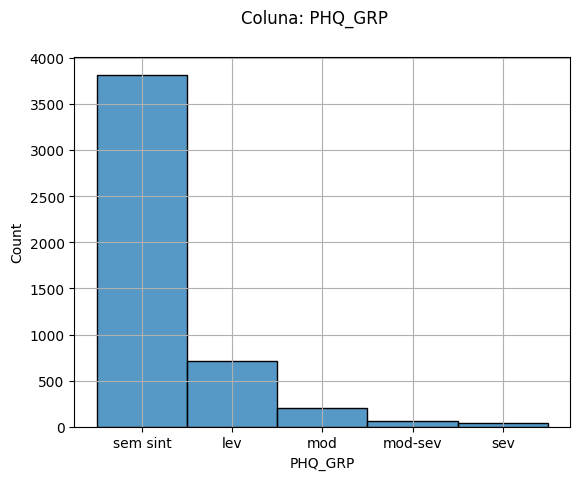

Coluna: PHQ_GRP
describe          value counts      value percents      
   count     4836     sem sint 3817       sem sint 0.716
  unique        5          lev  714            lev 0.134
     top sem sint          NaN  498            NaN 0.093
    freq     3817          mod  206            mod 0.039
     NaN      NaN      mod-sev   64        mod-sev 0.012
     NaN      NaN          sev   35            sev 0.007


In [13]:
kwargs = {
    "discrete": True, 
}

analysis = column_descriptive_analysis(df, 'PHQ_GRP', plot_kwargs=kwargs)

#### Análises

Esta base possui quase 10% de dados ausentes, e em todas as questões houveram mais respostas ausentes do que valores `2` e `3`. Como o objetivo principal do estudo é a relação dos dados de saúde mental com outros aspectos, vamos remover as linhas que não tiveram nenhuma resposta no PHQ.

Além disso, os grupos de `mod-sev` e `sev` ficaram muito pequenos (aproximadamente 2% dos casos). Esta subrepresentação pode interferir na análise dos resultados, portanto vamos juntá-lo com o grupo `mod`.

#### Tratamento

O tratamento dos nulos será feito mais abaixo, junto com nulos de outras colunas.

In [14]:
values_map = {
    'sev': 'mod-sev',
    'mod': 'mod-sev',
}
df['PHQ_GRP'].replace(values_map, inplace=True)

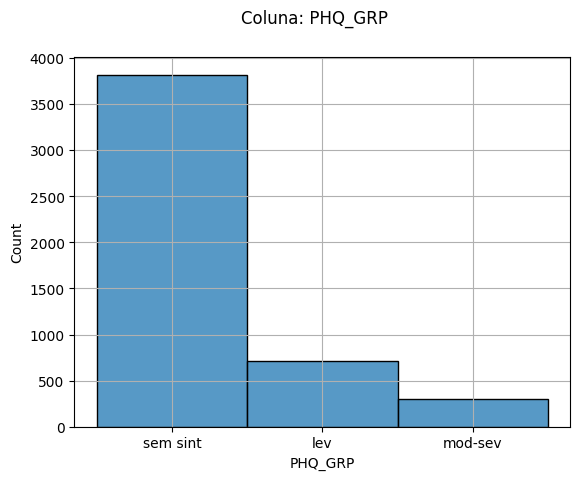

Coluna: PHQ_GRP
describe          value counts      value percents      
   count     4836     sem sint 3817       sem sint 0.716
  unique        3          lev  714            lev 0.134
     top sem sint          NaN  498            NaN 0.093
    freq     3817      mod-sev  305        mod-sev 0.057


In [15]:
analysis = column_descriptive_analysis(df, 'PHQ_GRP', plot_kwargs=kwargs)

### DEMO

In [16]:
print(demo_cols)

['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC']


#### RIAGENDR

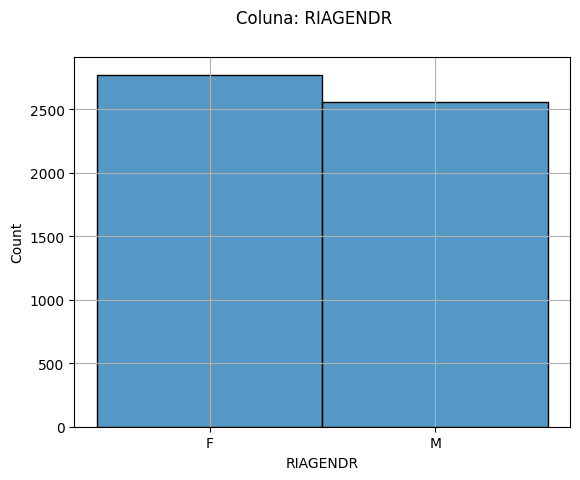

Coluna: RIAGENDR
describe      value counts           value percents      
   count 5334            F 2,773.000              F 0.520
  unique    2            M 2,561.000              M 0.480
     top    F          NaN       NaN            NaN   NaN
    freq 2773          NaN       NaN            NaN   NaN


In [17]:
col = 'RIAGENDR'
analysis = column_descriptive_analysis(df, col)

#### RIDAGEYR

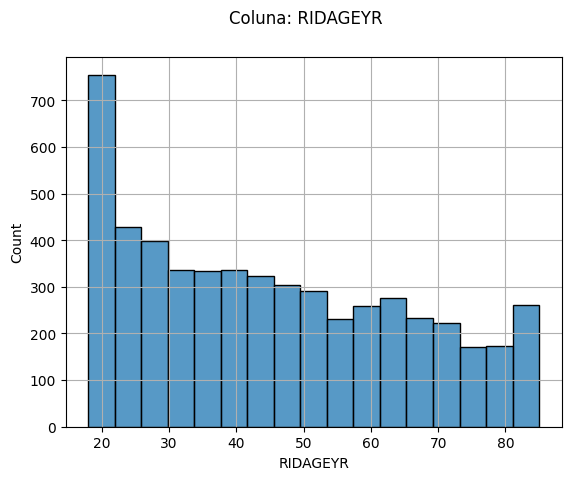

Coluna: RIDAGEYR
describe            value counts      value percents      
   count 5,334.000            18 301              18 0.056
    mean    45.090            19 260              19 0.049
     std    20.146            85 148              85 0.028
     min    18.000            29 113              29 0.021
      1%    18.000            23 111              23 0.021
     25%    27.000            25 109              25 0.020
     50%    43.000            22 105              22 0.020
     75%    62.000            24 104              24 0.019
     99%    85.000            26 103              26 0.019
     max    85.000            40 103              40 0.019
     NaN       NaN            21  99              21 0.019
     NaN       NaN            28  97              28 0.018
     NaN       NaN            20  95              20 0.018
     NaN       NaN            30  93              30 0.017
     NaN       NaN            34  93              34 0.017
     NaN       NaN            45  92   

In [18]:
col = 'RIDAGEYR'
kwargs = {
    # "discrete": True, 
}

analysis = column_descriptive_analysis(df, col, crop_values=20, plot_kwargs=kwargs)

In [19]:
# Comparação das frequencias dos valores
top3 = df.RIDAGEYR.value_counts(normalize=True)[:3]
print('Frequencia acumulada pelos 3 valores mais comuns:', top3.sum())

under_top3 = df.RIDAGEYR.value_counts(normalize=True)[3:]
print('Frequencia média dos outros valores:', under_top3.sum()/under_top3.count())

Frequencia acumulada pelos 3 valores mais comuns: 0.13292088488938883
Frequencia média dos outros valores: 0.013339678694009404


##### Análise

Os dados estão concentrados nas extremidades (os valores `18`, `19` e `85` concentram aproximadamente 13% das respostas, enquanto os outros valores aparecem aproximadamente 1% cada). Esta coluna não possui valores ausentes.

In [20]:
def get_age_range(value):
    if value <= 25: return '18 - 25'
    if value <= 35: return '26 - 35'
    if value <= 45: return '36 - 45'
    if value <= 55: return '46 - 55'
    if value <= 65: return '56 - 65'
    if value <= 75: return '66 - 75'
    if value > 75: return '76 - 85'
    return np.nan

df['RIDAGEYR_GRP'] = df['RIDAGEYR'].map(get_age_range)

In [21]:
# Converte a coluna em Categorical para definir ordenação padrão
df['RIDAGEYR_GRP'] = pd.Categorical(
    df['RIDAGEYR_GRP'], ['18 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65', '66 - 75', '76 - 85']
)

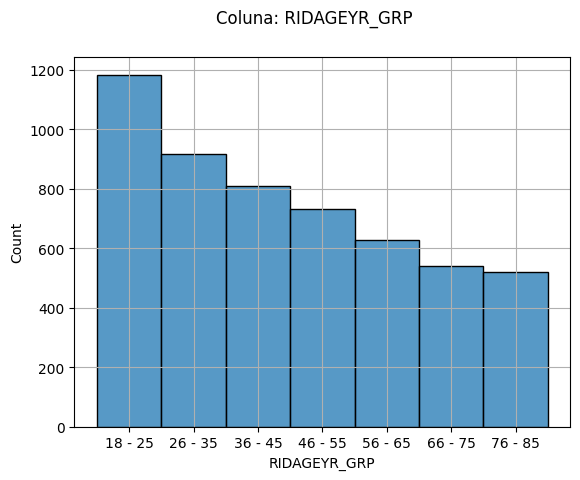

Coluna: RIDAGEYR_GRP
describe         value counts      value percents      
   count    5334      18 - 25 1184        18 - 25 0.222
  unique       7      26 - 35  918        26 - 35 0.172
     top 18 - 25      36 - 45  810        36 - 45 0.152
    freq    1184      46 - 55  734        46 - 55 0.138
     NaN     NaN      56 - 65  628        56 - 65 0.118
     NaN     NaN      66 - 75  540        66 - 75 0.101
     NaN     NaN      76 - 85  520        76 - 85 0.097


In [22]:
_ = column_descriptive_analysis(df, 'RIDAGEYR_GRP')

#### RIDRETH1

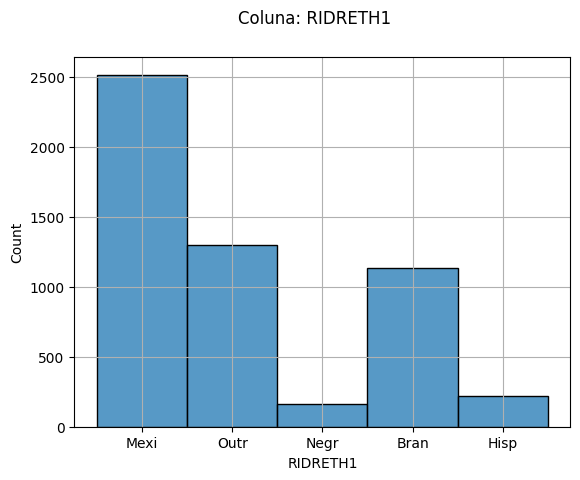

Coluna: RIDRETH1
describe      value counts      value percents      
   count 5334         Mexi 2516           Mexi 0.472
  unique    5         Outr 1300           Outr 0.244
     top Mexi         Bran 1133           Bran 0.212
    freq 2516         Hisp  221           Hisp 0.041
     NaN  NaN         Negr  164           Negr 0.031


In [23]:
col = 'RIDRETH1'
kwargs = {
    # "discrete": True, 
}

_ = column_descriptive_analysis(df, col, plot_kwargs=kwargs)

#### DMDEDUC

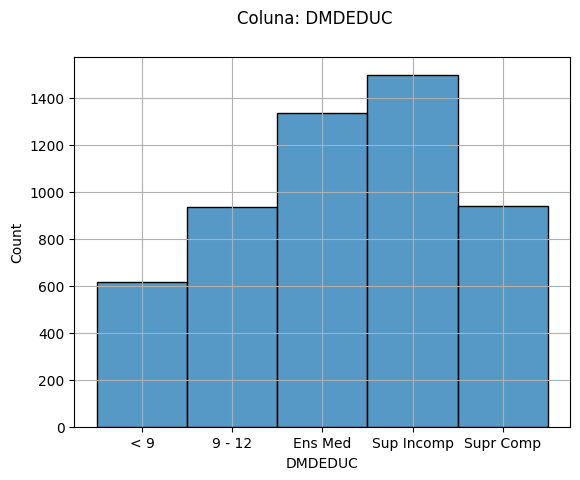

Coluna: DMDEDUC
describe            value counts      value percents      
   count       5326   Sup Incomp 1498     Sup Incomp 0.281
  unique          5      Ens Med 1335        Ens Med 0.250
     top Sup Incomp    Supr Comp  939      Supr Comp 0.176
    freq       1498       9 - 12  936         9 - 12 0.175
     NaN        NaN          < 9  618            < 9 0.116
     NaN        NaN          NaN    8            NaN 0.001


In [24]:
col = 'DMDEDUC'
kwargs = {
    # "discrete": True, 
}

analysis = column_descriptive_analysis(df, col, plot_kwargs=kwargs)

#### INDFMINC
Renda anual familiar (US$):

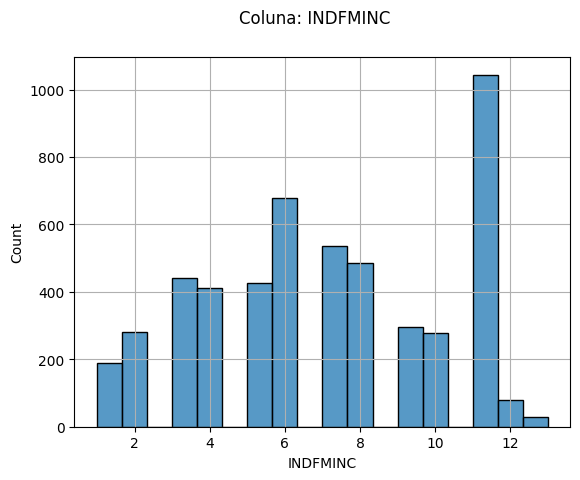

Coluna: INDFMINC
describe            value counts       value percents      
   count 5,174.000        11.000 1044          11.000 0.196
    mean     6.920         6.000  678           6.000 0.127
     std     3.136         7.000  535           7.000 0.100
     min     1.000         8.000  485           8.000 0.091
      1%     1.000         3.000  440           3.000 0.082
     25%     4.000         5.000  426           5.000 0.080
     50%     7.000         4.000  412           4.000 0.077
     75%    10.000         9.000  297           9.000 0.056
     99%    12.000         2.000  281           2.000 0.053
     max    13.000        10.000  278          10.000 0.052
     NaN       NaN         1.000  190           1.000 0.036
     NaN       NaN           NaN  160             NaN 0.030
     NaN       NaN        12.000   78          12.000 0.015
     NaN       NaN        13.000   30          13.000 0.006


In [25]:
col = 'INDFMINC'
kwargs = {
    # "discrete": True, 
}

_ = column_descriptive_analysis(df, col, plot_kwargs=kwargs)

##### Análise

As alternativas não são todas mutualmente exclusivas, pois as alternativas `12` (maior que 20000) e `13` (menor que 20000) cobrem valores que já estão cobertos em alternativas anteriores.

Iremos: 
- Criar uma nova coluna, com grupos para renda acima ou abaixo de 20000
- Substituir os valores `12` e `13` por `np.nan
- Dividir a coluna em faixas

In [26]:
# Criando nova coluna com divisão por renda de 20k
def get_INDFMINC_20k_group(value):
    below_20k = [1.0, 2.0, 3.0, 4.0, 13.0]
    above_20k = [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
    
    if value in below_20k:
        return '< 20k'
    
    if value in above_20k:
        return '> 20k'
    
    return np.nan
    
df['INDFMINC_ABV20K'] = df['INDFMINC'].map(get_INDFMINC_20k_group)

In [27]:
# Converte a coluna em Categorical para definir ordenação padrão
df['INDFMINC_ABV20K'] = pd.Categorical(
    df['INDFMINC_ABV20K'], ['< 20k', '> 20k']
)

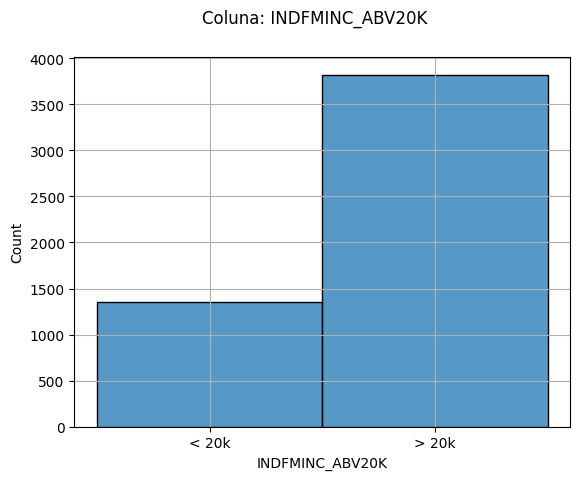

Coluna: INDFMINC_ABV20K
describe       value counts           value percents      
   count  5174        > 20k 3,821.000          > 20k 0.716
  unique     2        < 20k 1,353.000          < 20k 0.254
     top > 20k          NaN   160.000            NaN 0.030
    freq  3821          NaN       NaN            NaN   NaN


In [28]:
# Visualizando a nova coluna
_ = column_descriptive_analysis(df, 'INDFMINC_ABV20K',)

In [29]:
# Marcando como ausentes os valores 12 e 13, já que não estão na mesma escala
df[["INDFMINC"]] = df[["INDFMINC"]].replace([12.0, 13.0], np.nan)

In [30]:
# Cria coluna por grupo de INDFMINC
def get_INDFMINC_range(value):
    if value == 1: return '< 5k'
    if value == 2: return '5k - 10k'
    if value == 3: return '10k - 15k'
    if value == 4: return '15k - 20k'
    if value == 5: return '20k - 25k'
    if value == 6: return '25k - 35k'
    if value == 7: return '35k - 45k'
    if value == 8: return '45k - 55k'
    if value == 9: return '55k - 65k'
    if value == 10: return '65k - 75k'
    if value == 11: return '> 75k'
    return np.nan

df['INDFMINC_GRP'] = df['INDFMINC'].map(get_INDFMINC_range)

In [31]:
# Converte a coluna em Categorical para definir ordenação padrão
df['INDFMINC_GRP'] = pd.Categorical(
    df['INDFMINC_GRP'], [
        '< 5k', '5k - 10k', '10k - 15k', '15k - 20k', '20k - 25k', 
        '25k - 35k', '35k - 45k', '45k - 55k', '55k - 65k', '65k - 75k', '> 75k'
    ]
)

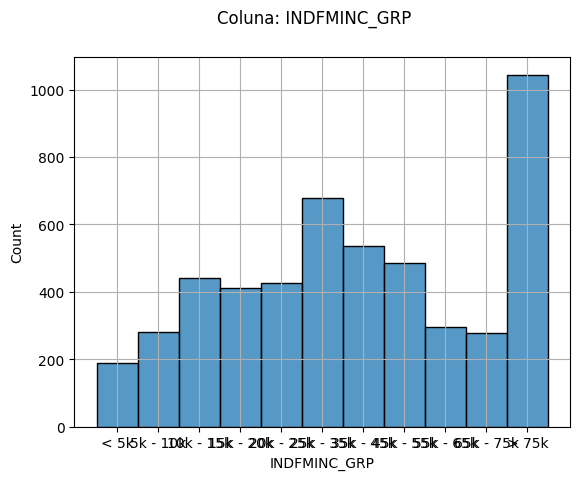

Coluna: INDFMINC_GRP
describe       value counts      value percents      
   count  5066        > 75k 1044          > 75k 0.196
  unique    11    25k - 35k  678      25k - 35k 0.127
     top > 75k    35k - 45k  535      35k - 45k 0.100
    freq  1044    45k - 55k  485      45k - 55k 0.091
     NaN   NaN    10k - 15k  440      10k - 15k 0.082
     NaN   NaN    20k - 25k  426      20k - 25k 0.080
     NaN   NaN    15k - 20k  412      15k - 20k 0.077
     NaN   NaN    55k - 65k  297      55k - 65k 0.056
     NaN   NaN     5k - 10k  281       5k - 10k 0.053
     NaN   NaN    65k - 75k  278      65k - 75k 0.052
     NaN   NaN          NaN  268            NaN 0.050
     NaN   NaN         < 5k  190           < 5k 0.036


In [32]:
_ = column_descriptive_analysis(df, 'INDFMINC_GRP', plot_kwargs=kwargs)

In [33]:
# Adicionando as colunas na lista de colunas
index = demo_cols.index('INDFMINC')
demo_cols.insert(index + 1, 'INDFMINC_ABV20K')
demo_cols.insert(index + 1, 'INDFMINC_GRP')

In [34]:
value_map = {
    1: np.mean([0,4999]), 2: np.mean([5000,9999]),
    3: np.mean([10000,14999]),4: np.mean([15000,19999]),
    5: np.mean([20000,24999]),6: np.mean([25000,34999]),
    7: np.mean([35000,44999]), 8: np.mean([45000,54999]),
    9: np.mean([55000,64999]), 10: np.mean([65000,74999]),
    11: np.mean([75000,84999]),
}

df['INDFMINC'].replace(value_map, inplace=True)

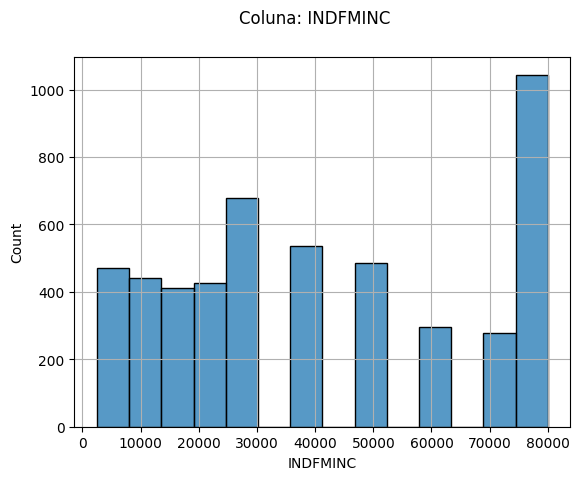

Coluna: INDFMINC
describe             value counts       value percents      
   count  5,066.000    79,999.500 1044      79,999.500 0.196
    mean 41,781.478    29,999.500  678      29,999.500 0.127
     std 25,815.024    39,999.500  535      39,999.500 0.100
     min  2,499.500    49,999.500  485      49,999.500 0.091
      1%  2,499.500    12,499.500  440      12,499.500 0.082
     25% 17,499.500    22,499.500  426      22,499.500 0.080
     50% 39,999.500    17,499.500  412      17,499.500 0.077
     75% 69,999.500    59,999.500  297      59,999.500 0.056
     99% 79,999.500     7,499.500  281       7,499.500 0.053
     max 79,999.500    69,999.500  278      69,999.500 0.052
     NaN        NaN           NaN  268             NaN 0.050
     NaN        NaN     2,499.500  190       2,499.500 0.036


In [35]:
# Visualizando dados INDFMINC após o tratamento
_ = column_descriptive_analysis(df, 'INDFMINC')

### PAG

In [36]:
print(pag_cols)

['PAG_MINW', 'ADHERENCE']


In [37]:
# for col in pag_cols:
#     utils.column_descriptive_analysis(df, col, normalize=False)

#### PAG_MINW

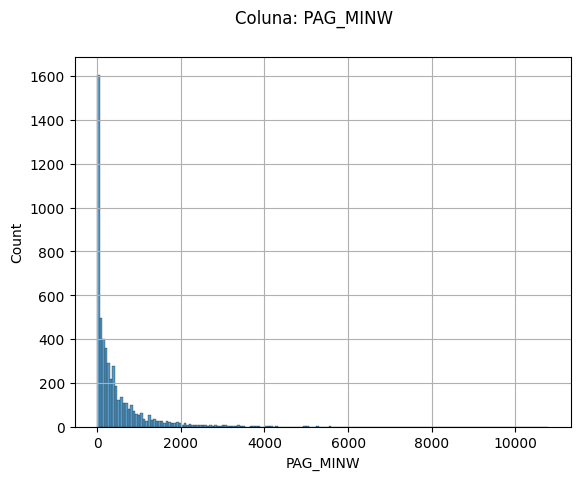

Coluna: PAG_MINW
describe             value counts      value percents      
   count  5,334.000         0.000 950           0.000 0.178
    mean    471.766        27.714 102          27.714 0.019
     std    780.353        55.427  95          55.427 0.018
     min      0.000       124.711  70         124.711 0.013
      1%      0.000       415.704  68         415.704 0.013
     25%     35.000       110.855  64         110.855 0.012
     50%    210.000        41.570  64          41.570 0.012
     75%    568.932        69.284  56          69.284 0.010
     99%  3,672.055        13.857  56          13.857 0.010
     max 10,777.829        83.141  52          83.141 0.010
     NaN        NaN       207.852  50         207.852 0.009
     NaN        NaN       138.568  44         138.568 0.008
     NaN        NaN        20.785  39          20.785 0.007
     NaN        NaN       166.282  39         166.282 0.007
     NaN        NaN       831.409  36         831.409 0.007
     NaN        NaN    

In [38]:
col = 'PAG_MINW'
_ = column_descriptive_analysis(df, col)

##### Análise

Esta coluna parece ter muitos outliers. Precisamos investigar mais para decidir como lidar com eles.

<AxesSubplot: xlabel='PAG_MINW'>

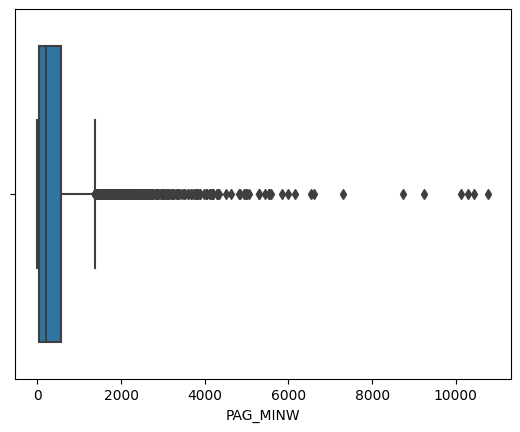

In [39]:
sns.boxplot(data=df, x="PAG_MINW")

In [40]:
# Checando viabilidade dos outliers
max_PAG_MINW = df['PAG_MINW'].max()

# Como atividades vigorosas contam minutos em dobro, vamos supor apenas atividades vigorosas para esta checagem
minutos_exercicio = max_PAG_MINW / 2
horas_exercicio =  minutos_exercicio / 60

print('Horas semanais de exercício:', horas_exercicio)
print('Horas diarias de exercício:', horas_exercicio / 7)

Horas semanais de exercício: 89.81524249422667
Horas diarias de exercício: 12.830748927746667


Passar quase 13h por praticando atividades físicas vigorosas diariamente parece muito pouco provável, mesmo para atletas profissionais. 

Portanto, vamos truncar os valores acima do 99º percentil.

In [41]:
threshold = df['PAG_MINW'].quantile(0.99)
df['PAG_MINW'] = df['PAG_MINW'].clip(upper=threshold)

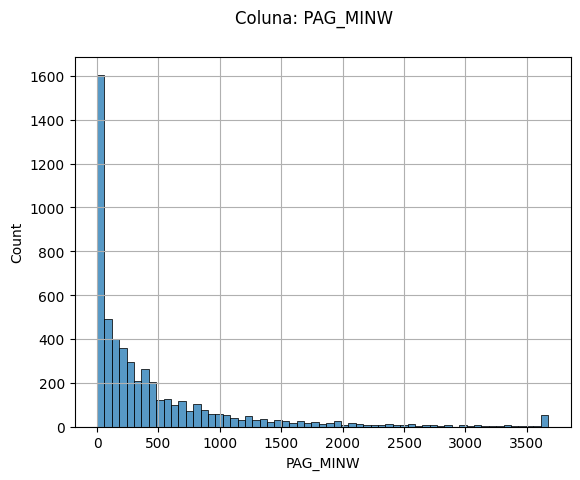

Coluna: PAG_MINW
describe            value counts      value percents      
   count 5,334.000         0.000 950           0.000 0.178
    mean   455.598        27.714 102          27.714 0.019
     std   666.610        55.427  95          55.427 0.018
     min     0.000       124.711  70         124.711 0.013
      1%     0.000       415.704  68         415.704 0.013
     25%    35.000        41.570  64          41.570 0.012
     50%   210.000       110.855  64         110.855 0.012
     75%   568.932        69.284  56          69.284 0.010
     99% 3,672.055        13.857  56          13.857 0.010
     max 3,672.055     3,672.055  55       3,672.055 0.010
     NaN       NaN        83.141  52          83.141 0.010
     NaN       NaN       207.852  50         207.852 0.009
     NaN       NaN       138.568  44         138.568 0.008
     NaN       NaN        20.785  39          20.785 0.007
     NaN       NaN       166.282  39         166.282 0.007
     NaN       NaN       831.409  36   

In [42]:
_ = column_descriptive_analysis(df, 'PAG_MINW')

#### ADHERENCE

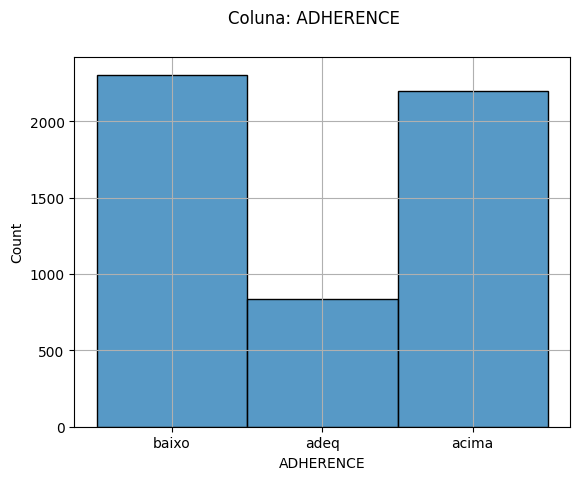

Coluna: ADHERENCE
describe       value counts           value percents      
   count  5334        baixo 2,304.000          baixo 0.432
  unique     3        acima 2,196.000          acima 0.412
     top baixo         adeq   834.000           adeq 0.156
    freq  2304          NaN       NaN            NaN   NaN


In [43]:
col = 'ADHERENCE'
_ = column_descriptive_analysis(df, col)

### HEI

#### Visualização Geral

In [44]:
print(hei_cols)

['HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN', 'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN', 'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT', 'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN', 'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']


In [45]:
df[hei_cols].describe()

,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
count,"5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000","5,060.000"
mean,3.204,1.808,2.491,2.362,1.765,3.757,4.434,2.593,4.707,4.762,5.799,6.068,6.220,49.971
std,1.470,2.141,1.951,2.173,1.915,1.605,1.008,2.172,3.237,3.420,3.496,3.178,3.330,12.325
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.059
25%,2.063,0.000,0.449,0.000,0.000,2.592,4.171,0.000,2.024,1.588,2.925,3.697,3.725,41.032
50%,3.217,0.063,2.324,2.078,1.026,4.941,5.000,2.588,4.430,4.834,6.234,6.415,6.864,49.512
75%,4.832,4.505,4.940,5.000,3.407,5.000,5.000,5.000,7.271,7.651,9.253,8.997,9.454,58.168
max,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,10.000,10.000,10.000,10.000,10.000,89.529


#### HEI2015C1_TOTALVEG - HEI2015C13_ADDSUG

Colunas: HEI2015C1_TOTALVEG, HEI2015C2_GREEN_AND_BEAN, HEI2015C3_TOTALFRUIT, HEI2015C4_WHOLEFRUIT, HEI2015C5_WHOLEGRAIN, HEI2015C6_TOTALDAIRY, HEI2015C7_TOTPROT, HEI2015C8_SEAPLANT_PROT, HEI2015C9_FATTYACID, HEI2015C10_SODIUM, HEI2015C11_REFINEDGRAIN, HEI2015C12_SFAT, HEI2015C13_ADDSUG

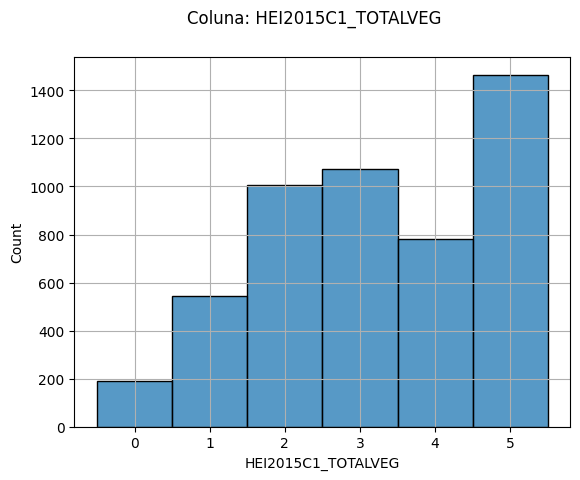

Coluna: HEI2015C1_TOTALVEG
describe            value counts       value percents      
   count 5,060.000         5.000 1181           5.000 0.221
    mean     3.204           NaN  274             NaN 0.051
     std     1.470         0.000   74           0.000 0.014
     min     0.000         3.249    2           3.249 0.000
      1%     0.000         1.122    2           1.122 0.000
     25%     2.063         3.045    2           3.045 0.000
     50%     3.217         1.881    2           1.881 0.000
     75%     4.832         0.773    2           0.773 0.000
     99%     5.000         3.621    2           3.621 0.000
     max     5.000         1.763    2           1.763 0.000


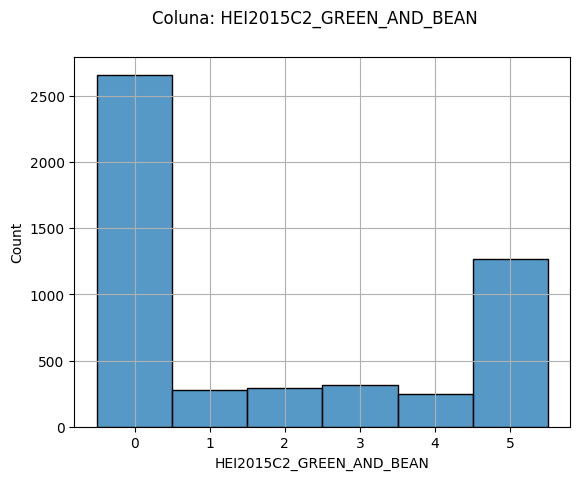

Coluna: HEI2015C2_GREEN_AND_BEAN
describe            value counts       value percents      
   count 5,060.000         0.000 2521           0.000 0.473
    mean     1.808         5.000 1155           5.000 0.217
     std     2.141           NaN  274             NaN 0.051
     min     0.000         2.174    2           2.174 0.000
      1%     0.000         2.336    2           2.336 0.000
     25%     0.000         0.669    2           0.669 0.000
     50%     0.063         1.423    2           1.423 0.000
     75%     4.505         4.395    2           4.395 0.000
     99%     5.000         2.469    2           2.469 0.000
     max     5.000         0.479    2           0.479 0.000


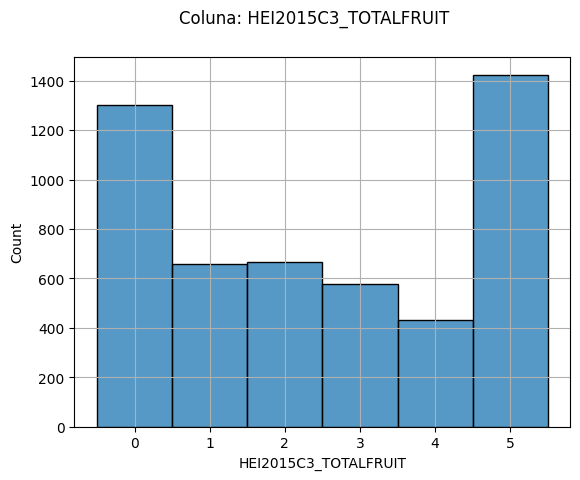

Coluna: HEI2015C3_TOTALFRUIT
describe            value counts       value percents      
   count 5,060.000         5.000 1247           5.000 0.234
    mean     2.491         0.000  726           0.000 0.136
     std     1.951           NaN  274             NaN 0.051
     min     0.000         3.676    3           3.676 0.001
      1%     0.000         1.672    2           1.672 0.000
     25%     0.449         0.050    2           0.050 0.000
     50%     2.324         4.493    2           4.493 0.000
     75%     4.940         3.169    2           3.169 0.000
     99%     5.000         0.099    2           0.099 0.000
     max     5.000         0.470    2           0.470 0.000


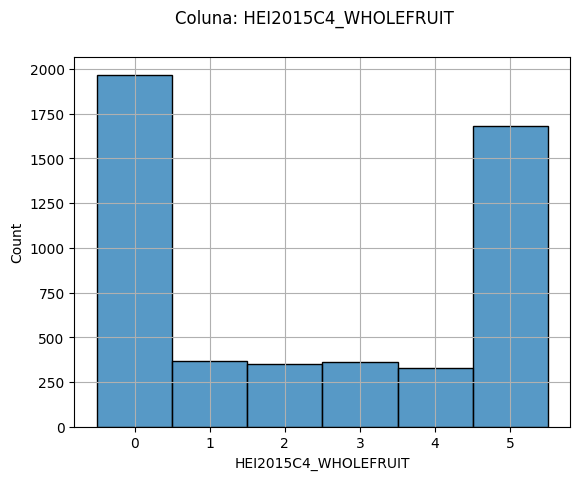

Coluna: HEI2015C4_WHOLEFRUIT
describe            value counts       value percents      
   count 5,060.000         5.000 1551           5.000 0.291
    mean     2.362         0.000 1451           0.000 0.272
     std     2.173           NaN  274             NaN 0.051
     min     0.000         0.046    4           0.046 0.001
      1%     0.000         3.676    2           3.676 0.000
     25%     0.000         3.906    2           3.906 0.000
     50%     2.078         2.102    2           2.102 0.000
     75%     5.000         0.237    2           0.237 0.000
     99%     5.000         0.196    2           0.196 0.000
     max     5.000         4.899    2           4.899 0.000


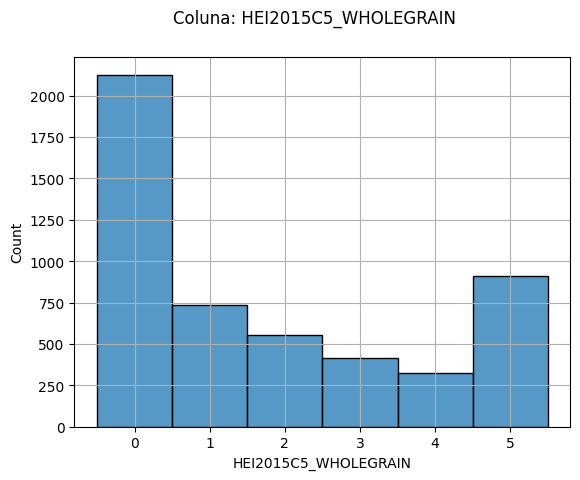

Coluna: HEI2015C5_WHOLEGRAIN
describe            value counts       value percents      
   count 5,060.000         0.000 1846           0.000 0.346
    mean     1.765         5.000  796           5.000 0.149
     std     1.915           NaN  274             NaN 0.051
     min     0.000         1.932    2           1.932 0.000
      1%     0.000         4.831    2           4.831 0.000
     25%     0.000         0.347    2           0.347 0.000
     50%     1.026         4.762    2           4.762 0.000
     75%     3.407         1.709    2           1.709 0.000
     99%     5.000         3.133    2           3.133 0.000
     max     5.000         2.899    2           2.899 0.000


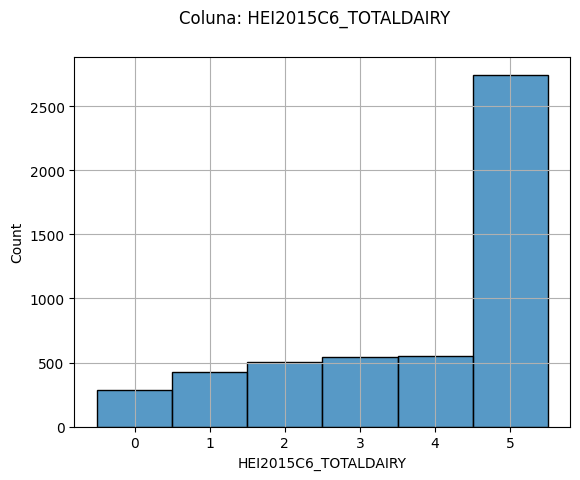

Coluna: HEI2015C6_TOTALDAIRY
describe            value counts       value percents      
   count 5,060.000         5.000 2498           5.000 0.468
    mean     3.757           NaN  274             NaN 0.051
     std     1.605         0.000   91           0.000 0.017
     min     0.000         4.954    2           4.954 0.000
      1%     0.000         4.808    2           4.808 0.000
     25%     2.592         3.687    2           3.687 0.000
     50%     4.941         2.511    2           2.511 0.000
     75%     5.000         4.931    2           4.931 0.000
     99%     5.000         3.619    2           3.619 0.000
     max     5.000         4.459    2           4.459 0.000


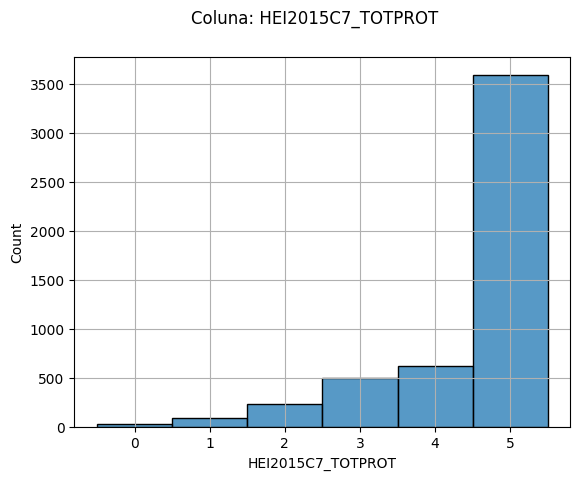

Coluna: HEI2015C7_TOTPROT
describe            value counts       value percents      
   count 5,060.000         5.000 3212           5.000 0.602
    mean     4.434           NaN  274             NaN 0.051
     std     1.008         0.000   12           0.000 0.002
     min     0.000         4.996    2           4.996 0.000
      1%     0.809         3.052    1           3.052 0.000
     25%     4.171         2.605    1           2.605 0.000
     50%     5.000         4.506    1           4.506 0.000
     75%     5.000         0.718    1           0.718 0.000
     99%     5.000         3.217    1           3.217 0.000
     max     5.000         4.839    1           4.839 0.000


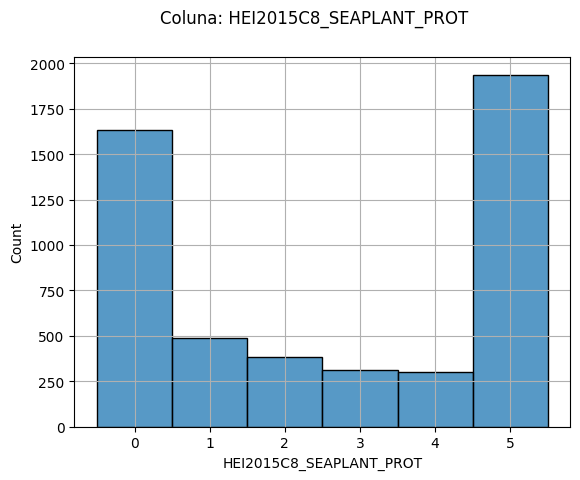

Coluna: HEI2015C8_SEAPLANT_PROT
describe            value counts       value percents      
   count 5,060.000         5.000 1791           5.000 0.336
    mean     2.593         0.000 1299           0.000 0.244
     std     2.172           NaN  274             NaN 0.051
     min     0.000         4.416    2           4.416 0.000
      1%     0.000         3.968    2           3.968 0.000
     25%     0.000         3.843    2           3.843 0.000
     50%     2.588         3.662    2           3.662 0.000
     75%     5.000         0.030    2           0.030 0.000
     99%     5.000         2.137    2           2.137 0.000
     max     5.000         1.943    2           1.943 0.000


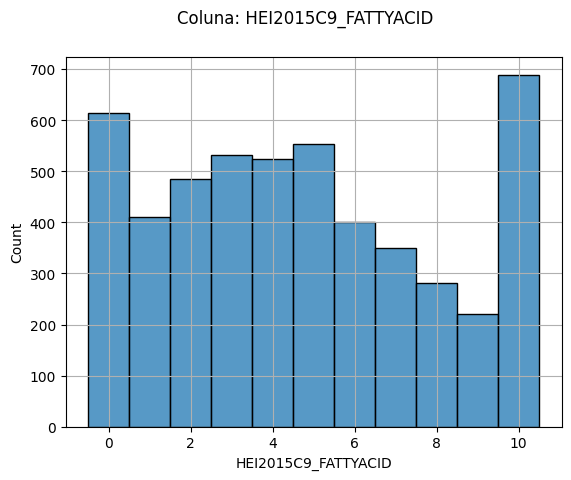

Coluna: HEI2015C9_FATTYACID
describe            value counts      value percents      
   count 5,060.000        10.000 603          10.000 0.113
    mean     4.707         0.000 459           0.000 0.086
     std     3.237           NaN 274             NaN 0.051
     min     0.000         4.280   1           4.280 0.000
      1%     0.000         4.593   1           4.593 0.000
     25%     2.024         2.008   1           2.008 0.000
     50%     4.430         3.828   1           3.828 0.000
     75%     7.271         2.821   1           2.821 0.000
     99%    10.000         6.517   1           6.517 0.000
     max    10.000         3.788   1           3.788 0.000


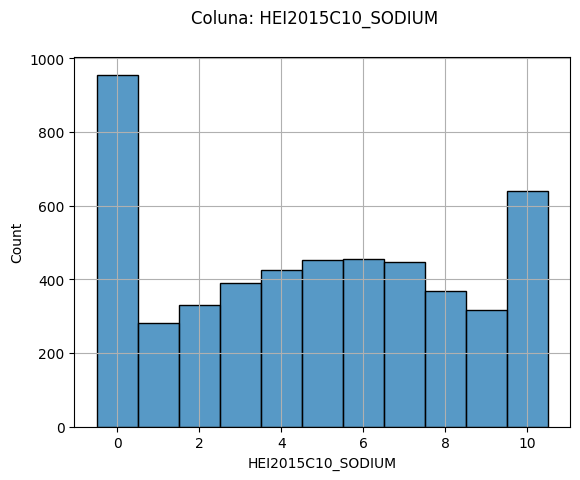

Coluna: HEI2015C10_SODIUM
describe            value counts      value percents      
   count 5,060.000         0.000 830           0.000 0.156
    mean     4.762        10.000 514          10.000 0.096
     std     3.420           NaN 274             NaN 0.051
     min     0.000         2.849   2           2.849 0.000
      1%     0.000         3.399   2           3.399 0.000
     25%     1.588         3.642   1           3.642 0.000
     50%     4.834         2.107   1           2.107 0.000
     75%     7.651         0.081   1           0.081 0.000
     99%    10.000         7.379   1           7.379 0.000
     max    10.000         6.807   1           6.807 0.000


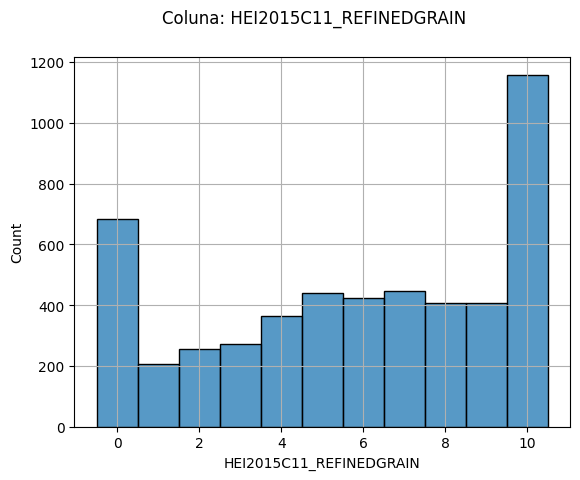

Coluna: HEI2015C11_REFINEDGRAIN
describe            value counts      value percents      
   count 5,060.000        10.000 996          10.000 0.187
    mean     5.799         0.000 599           0.000 0.112
     std     3.496           NaN 274             NaN 0.051
     min     0.000         3.867   2           3.867 0.000
      1%     0.000         4.379   2           4.379 0.000
     25%     2.925         7.898   2           7.898 0.000
     50%     6.234         7.200   2           7.200 0.000
     75%     9.253         4.597   2           4.597 0.000
     99%    10.000         2.914   2           2.914 0.000
     max    10.000         6.565   2           6.565 0.000


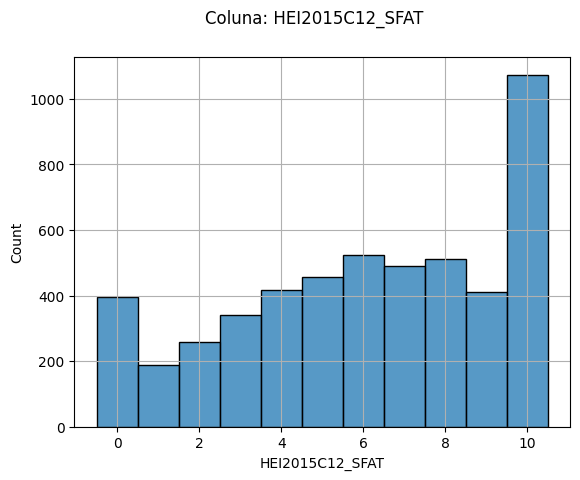

Coluna: HEI2015C12_SFAT
describe            value counts      value percents      
   count 5,060.000        10.000 897          10.000 0.168
    mean     6.068         0.000 318           0.000 0.060
     std     3.178           NaN 274             NaN 0.051
     min     0.000         6.849   2           6.849 0.000
      1%     0.000         5.463   1           5.463 0.000
     25%     3.697         7.516   1           7.516 0.000
     50%     6.415         5.134   1           5.134 0.000
     75%     8.997         7.800   1           7.800 0.000
     99%    10.000         1.036   1           1.036 0.000
     max    10.000         8.510   1           8.510 0.000


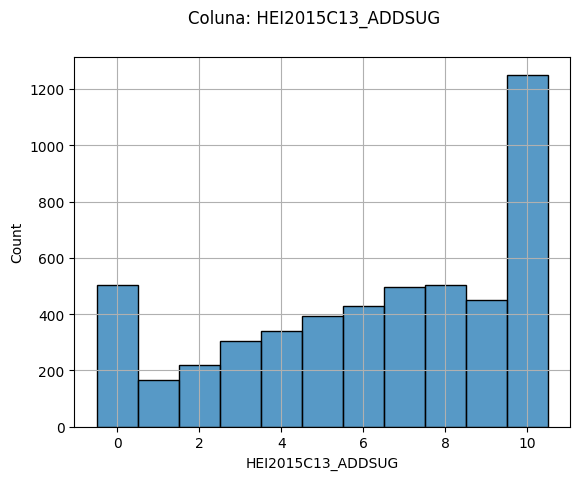

Coluna: HEI2015C13_ADDSUG
describe            value counts      value percents      
   count 5,060.000        10.000 997          10.000 0.187
    mean     6.220         0.000 428           0.000 0.080
     std     3.330           NaN 274             NaN 0.051
     min     0.000         8.151   2           8.151 0.000
      1%     0.000         5.211   2           5.211 0.000
     25%     3.725         5.420   1           5.420 0.000
     50%     6.864         7.071   1           7.071 0.000
     75%     9.454         4.525   1           4.525 0.000
     99%    10.000         5.660   1           5.660 0.000
     max    10.000         3.180   1           3.180 0.000


In [46]:
crop_values = 10
kwargs = {
    "discrete": True, 
}
for col in hei_cols[:-1]:
    column_descriptive_analysis(df, col, crop_values=crop_values, plot_kwargs=kwargs)

##### Análise

As colunas `HEI2015C5_WHOLEGRAIN` e `HEI2015C6_TOTALDAIRY` parecem estar em uma escala diferente da esperada. Elas deveriam ter valores de 0-10, porém em ambas o valor máximo é 5.0. Isto também se refletiu no cálculo de `HEI2015_TOTAL_SCORE`, que teoricamente poderia ir até 100, mas não passou de 90.

**Dúvidas:**
Estes valores são reais (e realmente nenhuma pessoa pontuou acima de 5), ou foi feita alguma transformação nos resultados?

#### HEI2015_TOTAL_SCORE

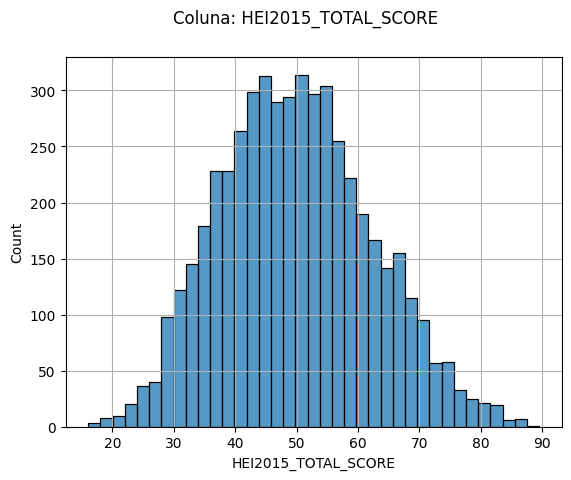

Coluna: HEI2015_TOTAL_SCORE
describe            value counts      value percents      
   count 5,060.000           NaN 274             NaN 0.051
    mean    49.971        45.000   3          45.000 0.001
     std    12.325        58.742   1          58.742 0.000
     min    16.059        41.135   1          41.135 0.000
      1%    24.681        53.886   1          53.886 0.000
     25%    41.032        36.842   1          36.842 0.000
     50%    49.512        46.859   1          46.859 0.000
     75%    58.168        68.379   1          68.379 0.000
     99%    79.858        44.149   1          44.149 0.000
     max    89.529        52.790   1          52.790 0.000


In [47]:
col = 'HEI2015_TOTAL_SCORE'
crop_values = 10
kwargs = {
    # "discrete": True, 
}
_ = column_descriptive_analysis(df, col, crop_values=crop_values, plot_kwargs=kwargs)

##### Analise

###### Teste de Normalidade

A distribuição se assemelha a uma curva de sino, mas será que é uma distribuição normal? 

Vamos verificar primeiro com o teste SHapiro-Wilk:

In [48]:
from scipy.stats import shapiro

shapiro(df[df['HEI2015_TOTAL_SCORE'].notna()]['HEI2015_TOTAL_SCORE'])

ShapiroResult(statistic=0.9946759343147278, pvalue=1.0064451442387545e-12)

O p-valor calculado é menor do que `alpha=0.05`, indicando que não seja um distribuição normal.
Porém, Shapiro-Wilk não muito indicado para amostras grandes, portanto vamos testar também um Q-Q Plot:

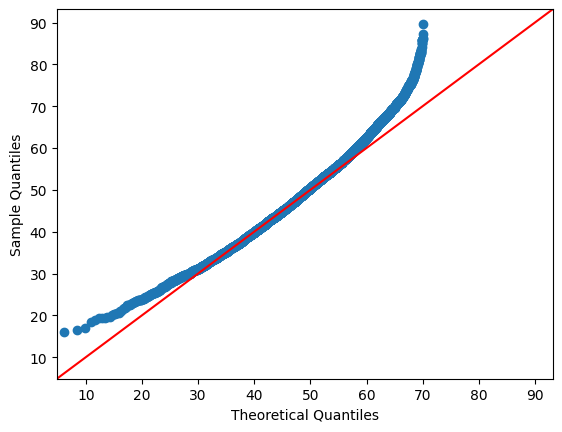

In [49]:
import statsmodels.api as sm

mean = df['HEI2015_TOTAL_SCORE'].mean()
std = df['HEI2015_TOTAL_SCORE'].std()

sm.qqplot(df['HEI2015_TOTAL_SCORE'], loc=mean, scale=std, line='45')
plt.show()

Como os pontos estão curvados, sem se alinhar a reta esperada, temos mais um indício de que a distribuição não é normal.

## Tratamento Geral

### Reordenação das Colunas

In [50]:
# Reordenando colunas
df = df[["SEQN"] + phq_cols + phq_score_cols + demo_cols + pag_cols + hei_cols]

### Tratamento de nulos

<AxesSubplot: >

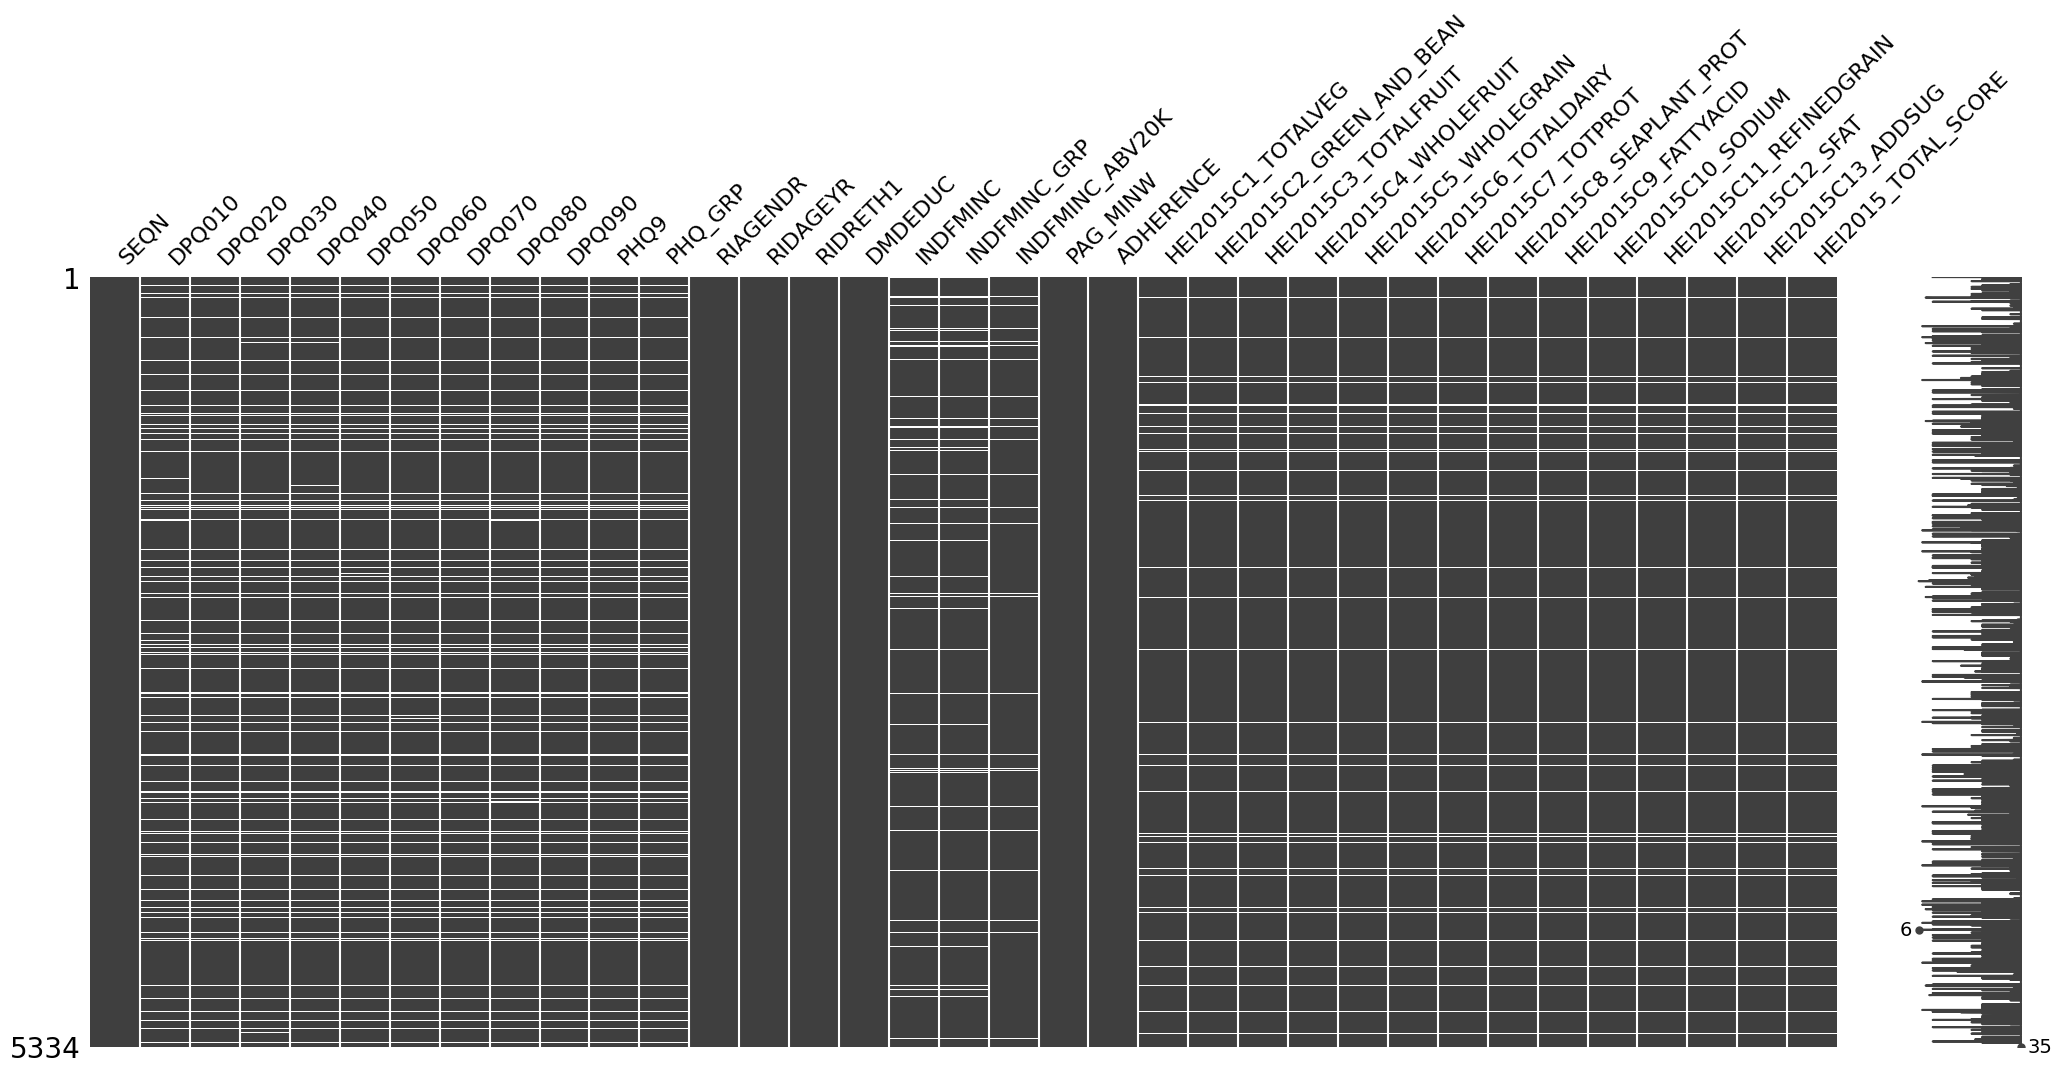

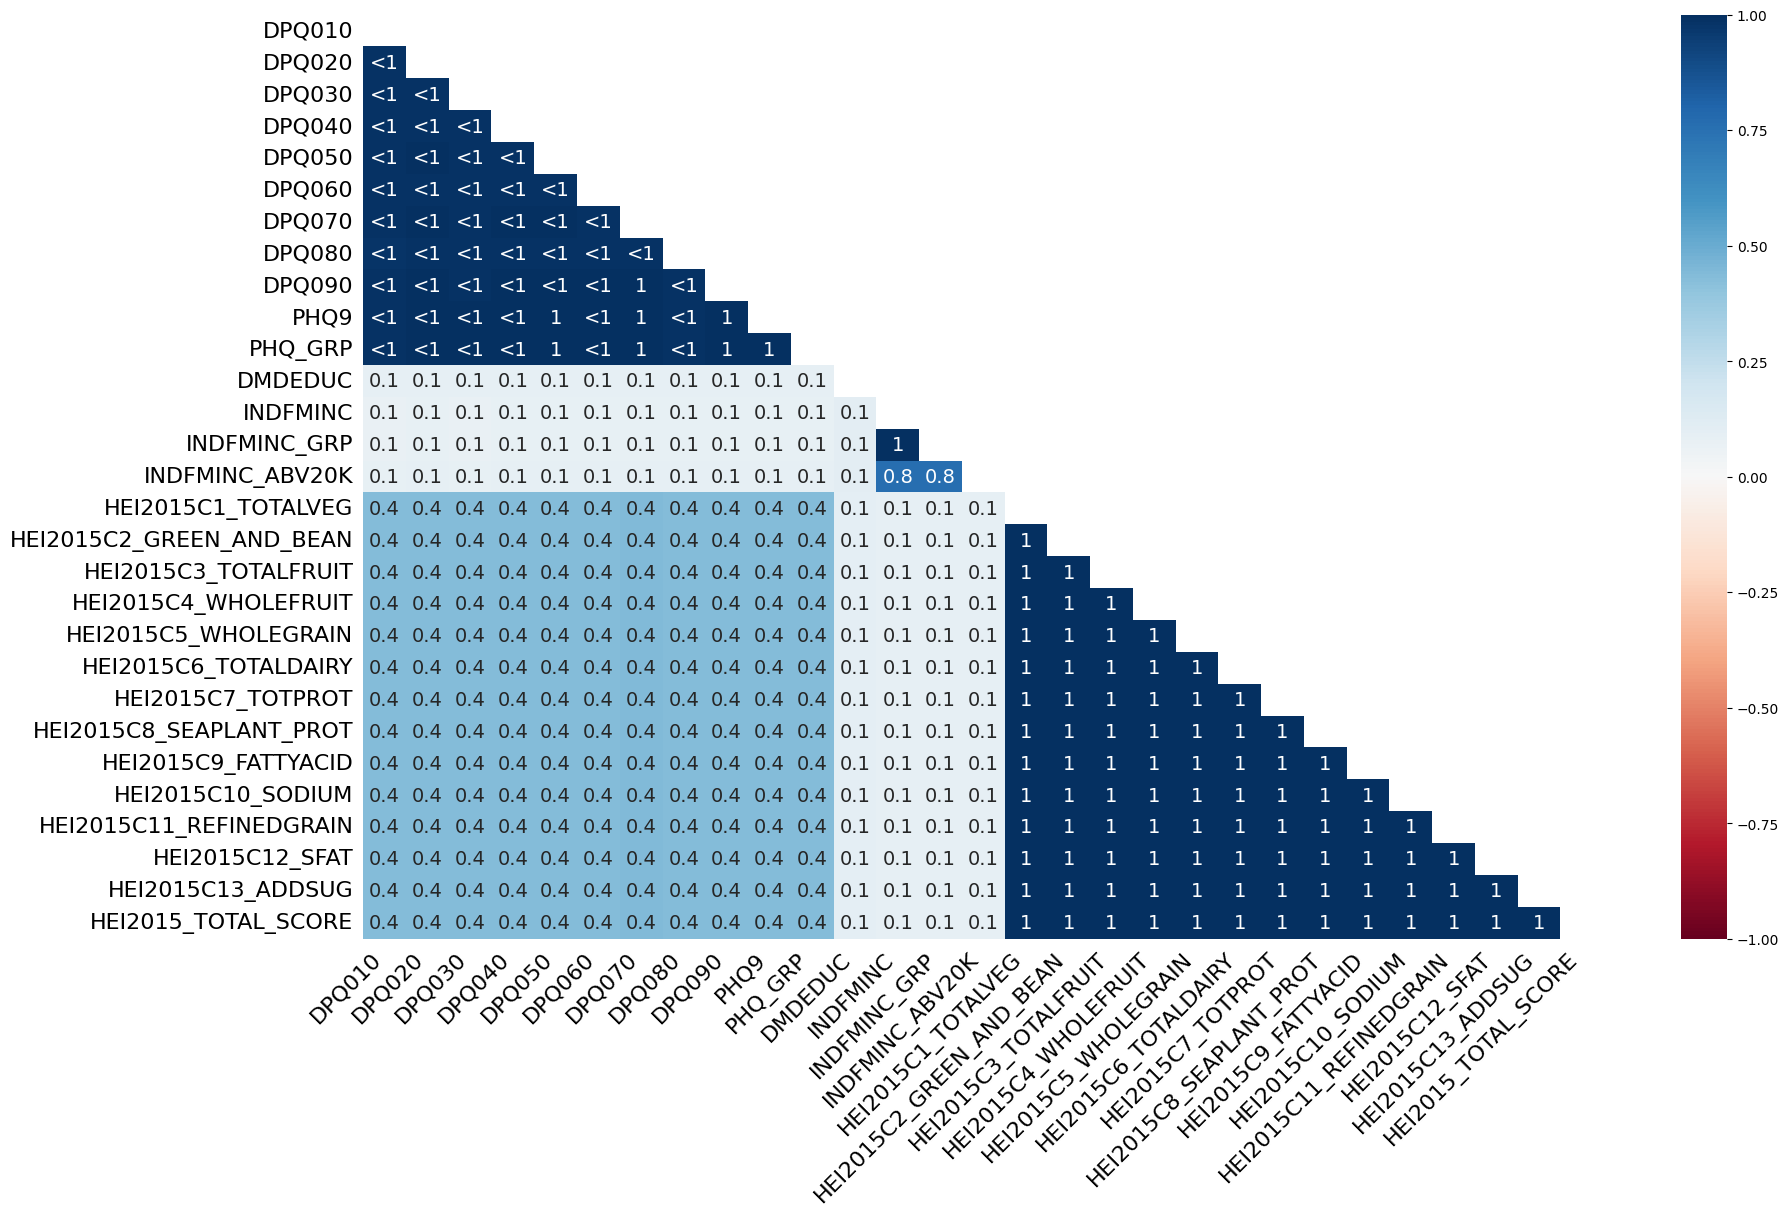

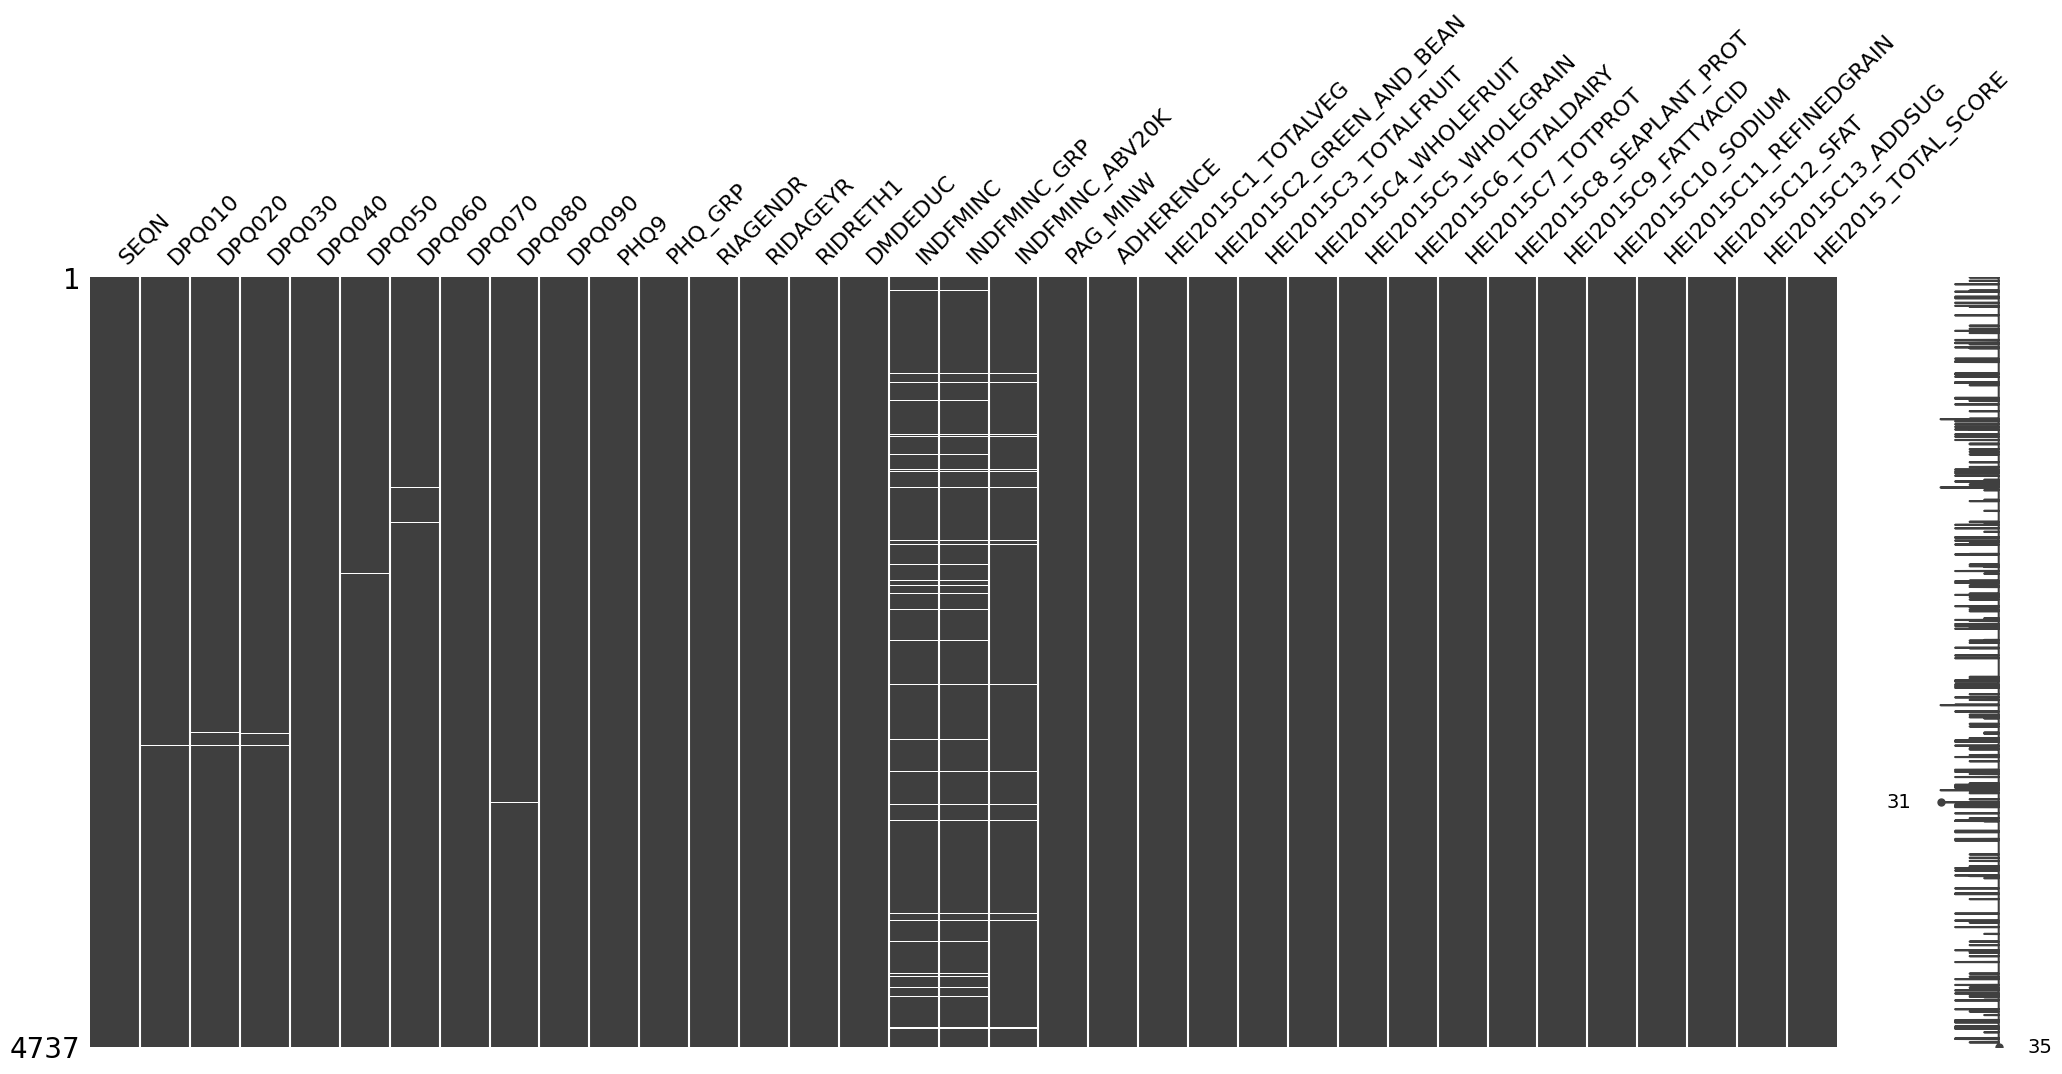

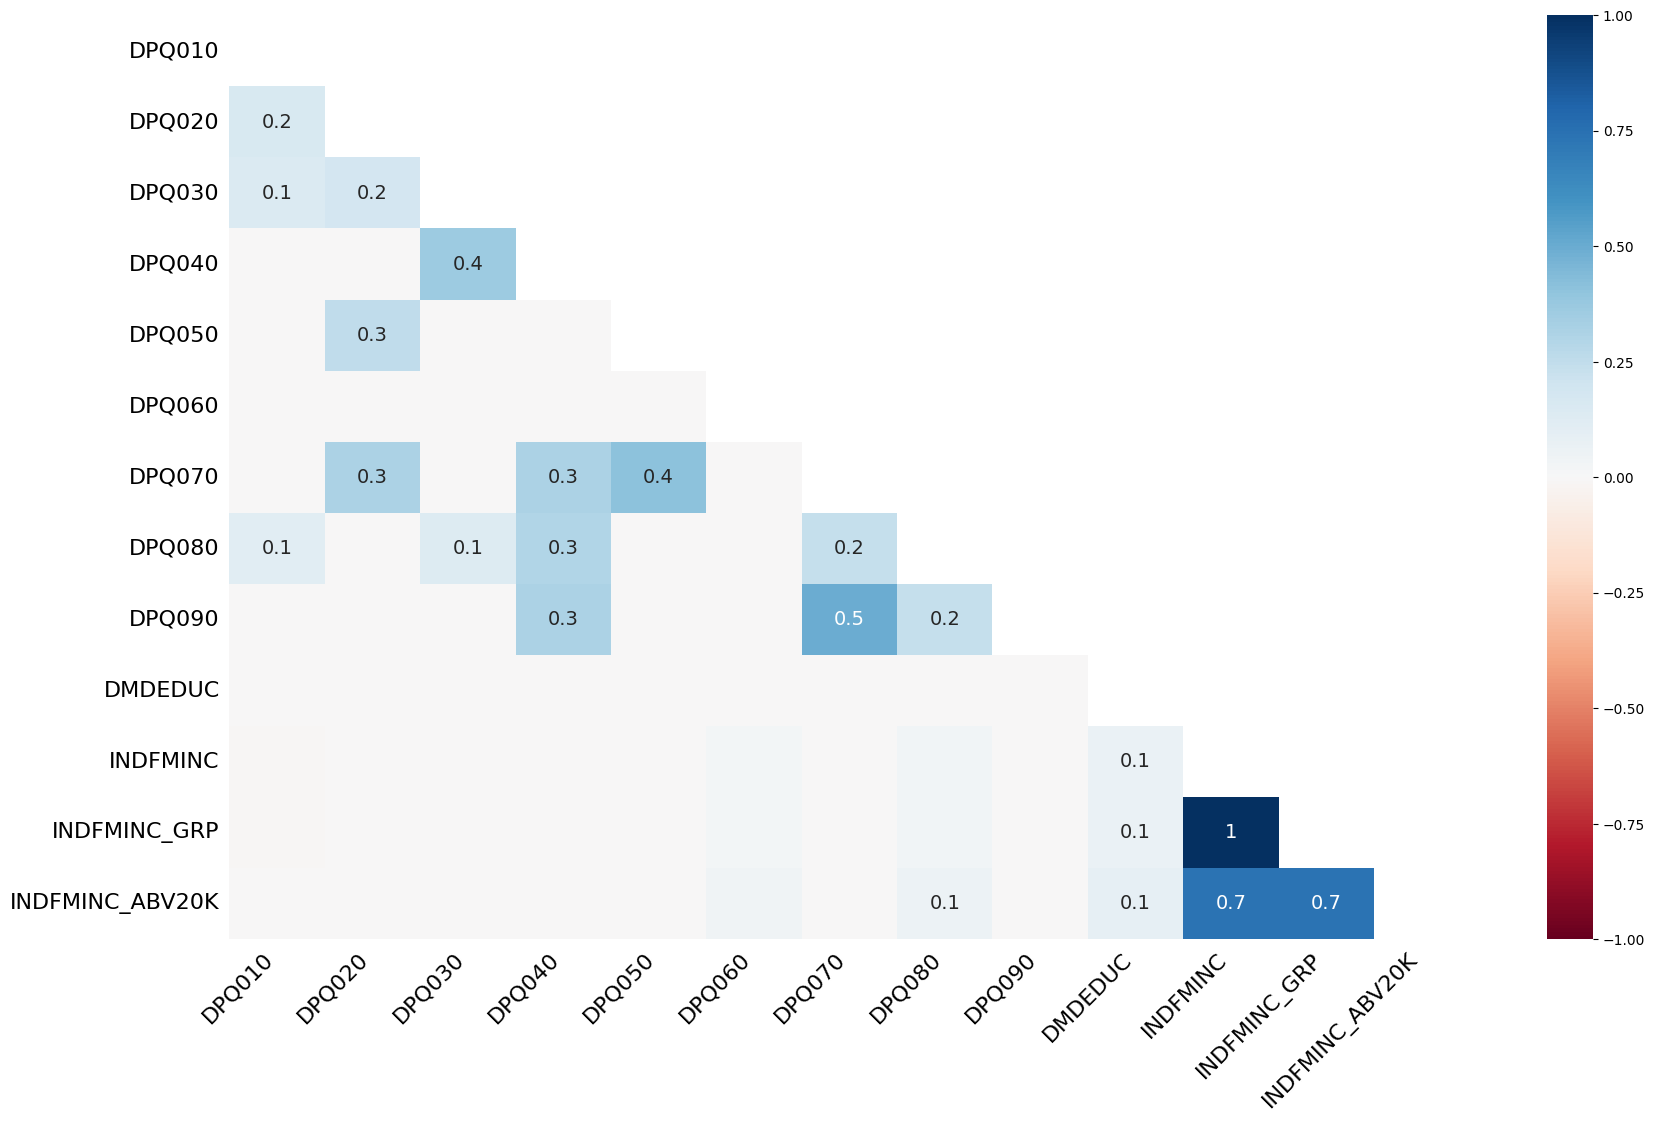

In [51]:
# Verificando valores nulos
msno.matrix(df)
msno.heatmap(df)

# Verificando valores nulos somente em linhas que responderam o PHQ-9 e o HEI
answered_phq9 = df.PHQ9.notna()
answered_hei = df.HEI2015_TOTAL_SCORE.notna()

msno.matrix(df[answered_phq9 * answered_hei])
msno.heatmap(df[answered_phq9 * answered_hei])

Percebe-se uma grande correlação nos nulos de acordo com a sua origem.

In [52]:
# Contando quantas linhas possuem pelo menos um valor nulo
rows_with_null = df.isna().any(1).sum()

print('Linhas com pelo menos um nulo:', rows_with_null)
print('Porcentagem de linhas com pelo menos um nulo:', rows_with_null/df.shape[0])

Linhas com pelo menos um nulo: 833
Porcentagem de linhas com pelo menos um nulo: 0.15616797900262466


Aproximadamente 85% dos dados possuem todas as colunas, portanto vamos remover todas as linhas que possuam algum nulo.

In [53]:
# Removendo linhas que possuam pelo menos um valor nulo
df = df[df.notna().all(1)]

### Validação dos Dados

In [54]:
# Validando dimensões do dataframe
assert df.shape == (4501, 35)

In [55]:
# Validar valores das colunas calculadas (scores PHQ e HEI)
assert utils.validate_score_columns(df, 'PHQ9', phq_cols)
assert utils.validate_score_columns(df, 'HEI2015_TOTAL_SCORE', hei_cols[:-1])

## Exportação dos Dados

In [57]:
# Exportando o dataframe mesclado
output_path = '../data/output/'
output_file = 'step_2_output.csv'

df.to_csv(f"{output_path}{output_file}", sep=',', encoding='utf-8', index=False)

In [58]:
print('Passo 2 finalizado')

Passo 2 finalizado
